In [1]:
# install the package
#install.packages("COVID19")
#install.packages("caret")
#install.packages("magrittr")
#install.packages("MASS")
# load the package
library("COVID19")
library("caret")
library("caret")
library("MASS")
# Worldwide data by country
data <- covid19("USA", raw=TRUE)

Warning message:
"package 'COVID19' was built under R version 3.6.3"Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'MASS' was built under R version 3.6.3"

We have invested a lot of time and effort in creating COVID-19 Data Hub, please cite the following when using it:

  Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open
  Source Software 5(51):2376, doi: 10.21105/joss.02376.

A BibTeX entry for LaTeX users is

  @Article{,
    title = {COVID-19 Data Hub},
    year = {2020},
    doi = {10.21105/joss.02376},
    author = {Emanuele Guidotti and David Ardia},
    journal = {Journal of Open Source Software},
    volume = {5},
    number = {51},
    pages = {2376},
  }

To retrieve citation and metadata of the data sources see ?covid19cite. To hide this message use 'verbose = FALSE'.


In [2]:
#colnames(data)  
dim(data)

[1] 593  36

In [3]:
df<-data.frame(matrix(unlist(data),nrow(data),byrow=FALSE))

In [4]:

colnames(df) <- colnames(data) 
#df


In [5]:
#df$vaccines #kapoies diorthoseis
#df$tests # cool
#df$confirmed #cool
#df$deaths #cool
#df$hosp #cool
#df$icu #cool
#df$recovered# conf - deaths = recovered kai eftiakse

In [6]:
data[is.na(data)] <- 0

In [7]:
df<-data.frame(matrix(unlist(data),nrow(data),byrow=FALSE))

In [8]:
colnames(df) <- colnames(data) 
#df

In [9]:
dim(df)
df<- subset(df, select= -c(vent,id, date, currency ,administrative_area_level ,administrative_area_level_1,administrative_area_level_2 ,administrative_area_level_3 ,latitude, longitude, key, key_apple_mobility, key_google_mobility, iso_alpha_3, iso_alpha_2, iso_numeric, population, school_closing, workplace_closing, cancel_events, gatherings_restrictions, transport_closing, stay_home_restrictions, internal_movement_restrictions,international_movement_restrictions, information_campaigns, testing_policy, contact_tracing, stringency_index))

#dim(df)
#sapply(df, class)

[1] 593  36

In [10]:
df$vaccines = as.numeric(as.character(df$vaccines))
df$tests = as.numeric(as.character(df$tests))
df$confirmed = as.numeric(as.character(df$confirmed))
df$deaths = as.numeric(as.character(df$deaths))
df$hosp = as.numeric(as.character(df$hosp))
df$icu = as.numeric(as.character(df$icu))
df$recovered = as.numeric(as.character(df$recovered))
#df$vent = as.numeric(as.character(df$vent)) exei midenika pantou


In [11]:
#sapply(df, class)

In [12]:
# sumplirosi kapoion timon gia ta vaccines pou itan NA kai pleon einai ises me 0
# tis times tis sumplirono me ton meso oro ton imeron prin kai meta tis meres pou exoun timi 0 meta tin thesi 336 pou arxizoun oi emvoliasmoi.
tmp_prev<-0
tmp_next<-0
cnt<-0
sum<-0
flag<-'true'
for(i in 336:length(df$vaccines)){
    if(df$vaccines[i]==0 && cnt==0){
        flag<-'false'
        tmp_prev<-df$vaccines[i-1]
    }
    if(df$vaccines[i]==0){
        cnt<-cnt+1
    }
    if(df$vaccines[i]!=0 && cnt!=0){
        tmp_next<-df$vaccines[i]
        sum<-(tmp_next-tmp_prev)/(cnt+1)
        while(cnt>0){
            df$vaccines[i-cnt]<-floor(sum)+df$vaccines[(i-cnt)-1]
            cnt<-cnt-1
        }
        flag<-'true'
    }
    if(df$vaccines[i]!=0 && flag=='false'){
        cnt<-0
    }
}


In [13]:
df$confirmed
df$vaccines
df$tests
df$deaths
df$recovered
df$hosp 
df$icu

[1]        1        1        2        2        5        5        5        6
  [9]        6        8        8        8       11       11       11       12
 [17]       12       12       12       12       13       13       14       14
 [25]       14       14       14       14       14       14       16       16
 [33]       16       16       16       16       17       17       25       32
 [41]       55       74      107      184      237      403      519      594
 [49]      782     1147     1586     2219     2978     3212     4679     6512
 [57]     9169    13663    20030    26025    34898    46136    56755    68837
 [65]    86693   105383   125013   143912   165989   192301   224583   256809
 [73]   289116   321502   351397   382787   413566   444798   480743   515146
 [81]   544229   571485   598424   627242   652650   682652   715718   743625
 [89]   769687   799507   825433   854344   887956   920283   950663   977151
 [97]  1000866  1025441  1051900  1081105  1116012  1143360  1167681  1191749
[105]  1216277  1240845  1268275  1295105  1320280  1339086  1358381  1381311
[113]  1401744  1428561  1453294  1477427  1495817  1518206  1539185  1561910
[121]  1587678  1611328  1632427  1652504  1671166  1690829  1709380  1731700
[129]  1756178  1779810  1798793  1816207  1837708  1857565  1879222  1904627
[137]  1925769  1943696  1961312  1979694  2000807  2023973  2048801  2074013
[145]  2092954  2112781  2136448  2163520  2192057  2223601  2255881  2281031
[153]  2313175  2350247  2386125  2426451  2472450  2513780  2554514  2595813
[161]  2642233  2694053  2750688  2802040  2847733  2898480  2941586  3002247
[169]  3062366  3124875  3192932  3252947  3311373  3370303  3438351  3506444
[177]  3582309  3654546  3717082  3777538  3839644  3904105  3974685  4043130
[185]  4116449  4181400  4236217  4293001  4359413  4431284  4498750  4567464
[193]  4623663  4669232  4714733  4773508  4827974  4887322  4946626  5000759
[201]  5046529  5094134  5142138  5198178  5249494  5314829  5361781  5400993
[209]  5437641  5482678  5529998  5574039  5622882  5665946  5700193  5736675
[217]  5777029  5822201  5867594  5914426  5957178  5991584  6026946  6068791
[225]  6109810  6154061  6204443  6247600  6278819  6302431  6329658  6363707
[233]  6399763  6447532  6488632  6523005  6557427  6596920  6635950  6681079
[241]  6730362  6772558  6811011  6862888  6902755  6941824  6988927  7037222
[249]  7081894  7119423  7152717  7196055  7235498  7281145  7336098  7384675
[257]  7420413  7459787  7505078  7556134  7614733  7671117  7726068  7772051
[265]  7813825  7866056  7925834  7990711  8059861  8116614  8165987  8233704
[273]  8295658  8358961  8435271  8517204  8599971  8662175  8729481  8806323
[281]  8885749  8976768  9076032  9165786  9270686  9355897  9483095  9587636
[289]  9717001  9845036  9972546 10087714 10208148 10348654 10495404 10660154
[297] 10840552 11008478 11144834 11307457 11471416 11644667 11836177 12034510
[305] 12213946 12360893 12534982 12710526 12893929 13006455 13214388 13370049
[313] 13510377 13670697 13859037 14061931 14285352 14517996 14733807 14915060
[321] 15109467 15333919 15556569 15787997 16028086 16245883 16433854 16628168
[329] 16837160 17083804 17323724 17575546 17767649 17955653 18154356 18352479
[337] 18582104 18776242 18874122 19100538 19256383 19430535 19630974 19864665
[345] 20100249 20254160 20554622 20763475 20947482 21182525 21438182 21716496
[353] 22011753 22272720 22486135 22700819 22927766 23158067 23393833 23636699
[361] 23838557 24016402 24160000 24336216 24519477 24713349 24904107 25074852
[369] 25206053 25357727 25505353 25659314 25828118 25994740 26137213 26249365
[377] 26384316 26499624 26621321 26745317 26879739 26983932 27073661 27164106
[385] 27259364 27354634 27460396 27560048 27647267 27712420 27766681 27829178
[393] 27899331 27969229 28048511 28120203 28177363 28233528 28305788 28380537
[401] 28458041 28535390 28600016 28651438 28709536 28766682 28833825 28901895
[409] 28968314 29026579 

[1]         0         0         0         0         0         0         0
  [8]         0         0         0         0         0         0         0
 [15]         0         0         0         0         0         0         0
 [22]         0         0         0         0         0         0         0
 [29]         0         0         0         0         0         0         0
 [36]         0         0         0         0         0         0         0
 [43]         0         0         0         0         0         0         0
 [50]         0         0         0         0         0         0         0
 [57]         0         0         0         0         0         0         0
 [64]         0         0         0         0         0         0         0
 [71]         0         0         0         0         0         0         0
 [78]         0         0         0         0         0         0         0
 [85]         0         0         0         0         0         0         0
 [92]         0         0         0         0         0         0         0
 [99]         0         0         0         0         0         0         0
[106]         0         0         0         0         0         0         0
[113]         0         0         0         0         0         0         0
[120]         0         0         0         0         0         0         0
[127]         0         0         0         0         0         0         0
[134]         0         0         0         0         0         0         0
[141]         0         0         0         0         0         0         0
[148]         0         0         0         0         0         0         0
[155]         0         0         0         0         0         0         0
[162]         0         0         0         0         0         0         0
[169]         0         0         0         0         0         0         0
[176]         0         0         0         0         0         0         0
[183]         0         0         0         0         0         0         0
[190]         0         0         0         0         0         0         0
[197]         0         0         0         0         0         0         0
[204]         0         0         0         0         0         0         0
[211]         0         0         0         0         0         0         0
[218]         0         0         0         0         0         0         0
[225]         0         0         0         0         0         0         0
[232]         0         0         0         0         0         0         0
[239]         0         0         0         0         0         0         0
[246]         0         0         0         0         0         0         0
[253]         0         0         0         0         0         0         0
[260]         0         0         0         0         0         0         0
[267]         0         0         0         0         0         0         0
[274]         0         0         0         0         0         0         0
[281]         0         0         0         0         0         0         0
[288]         0         0         0         0         0         0         0
[295]         0         0         0         0         0         0         0
[302]         0         0         0         0         0         0         0
[309]         0         0         0         0         0         0         0
[316]         0         0         0         0         0         0         0
[323]         0         0         0         0         0         0         0
[330]         0         0         0         0    556208    614117    811071
[337]   1008025   1320211   1632397   1944585   2035864   2127143   2460865
[344]   2794588   3271644   3748700   4225756   4394508   4563260   4836469
[351]   5306797   5919418   6688231   7454594   8220957   8987322   9327138
[358]  10278462  11148991  12279180  13136282  13993384  14850486  15707588
[365]  16525281  17546374  19107959  20537990  218

[1]         0         0         0         0         0         0         0
  [8]         0         0         0         0         0         0         0
 [15]         0         0         0         0         0         0         0
 [22]         0         0         0         0         0         0         0
 [29]         0         0         0         0         0         0         0
 [36]         0         0         0         0       348       861      1482
 [43]      2367      3568      5090      6861      8500     10897     14362
 [50]     19188     28051     39759     52754     67178     94445    134197
 [57]    184547    245024    321180    396870    470718    550387    654890
 [64]    769502    898714   1034463   1156119   1266317   1389746   1531953
 [71]   1685037   1846742   2015971   2163660   2302262   2445285   2625150
 [78]   2793377   2967335   3139323   3349726   3461241   3575348   3737818
 [85]   3910065   4094193   4292644   4459759   4594054   4754378   4975512
 [92]   5211268   5444350   5703722   5923221   6094762   6320527   6590201
 [99]   6884903   7207370   7543968   7812257   8027770   8278560   8598001
[106]   8957587   9320122   9723619  10059128  10307986  10627849  11049646
[113]  11499891  11949947  12395318  12761029  13065375  13418228  13851932
[120]  14314755  14774287  15266011  15655968  16002400  16331424  16792545
[127]  17345633  17881094  18427262  18880604  19253773  19692574  20214127
[134]  20796176  21414332  21987069  22451333  22856853  23305890  23866077
[141]  24494768  25109483  25725944  26257509  26670547  27176920  27849664
[148]  28555386  29257197  29961316  30545343  30966625  31514426  32214795
[155]  32981550  33752845  34562544  35255989  35822116  36486885  37342830
[162]  38227330  39085791  39886787  40507281  41034142  41759428  42662656
[169]  43643110  44654737  45670609  46510626  47208378  48076213  49079952
[176]  50115040  51143893  52190863  53103063  53821166  54728510  55764599
[183]  56873968  57957470  59031816  59913401  60590707  61388262  62356136
[190]  63396417  64434462  65424377  66216719  66840832  67617508  68501208
[197]  69466564  70456817  71472017  72287295  72913668  73698428  74607465
[204]  75635505  76615382  77576540  78344055  78916562  79593084  80488158
[211]  81492744  82488917  83453920  84248057  84809710  85476222  86381731
[218]  87399337  88419591  89406576  90204728  90819007  91480394  92387302
[225]  93413685  94445557  95444221  96260139  96825353  97239584  97902690
[232]  98861098  99948130 101047752 101912831 102539934 103248040 104214773
[239] 105353629 106511002 107739838 108677850 109301633 110051127 111080167
[246] 112284619 113486582 114615934 115554533 116151693 116819026 117803041
[253] 119003391 120227359 121418823 122394800 123035500 123842117 125069100
[260] 126481225 127911915 129312269 130415831 131163417 131972299 133036730
[267] 134265536 135568229 136897534 138013500 138783791 139658831 140935590
[274] 142414897 143946748 145411810 146591156 147384307 148337604 149677297
[281] 151180568 152665616 154166338 155386072 156285346 157301552 158665466
[288] 160297217 161992627 163669192 165124353 166134977 167358302 168896284
[295] 170686782 172539464 174442920 176040585 177237124 178727102 180631281
[302] 182729204 184803247 186951267 188806476 190227810 191899748 193869956
[309] 196093382 197598717 199109195 200456049 201606905 203070765 204912645
[316] 207008916 209154799 211271105 212961642 214253605 215792464 217705130
[323] 219827230 222007218 224061831 225782907 227031016 228522818 230465540
[330] 232540664 234591396 236611526 238321671 239597178 241123805 243109872
[337] 245387371 247277271 248354249 249345843 250290940 251580937 253442278
[344] 255628553 257549197 258792394 259901565 260943357 262337570 264291827
[351] 266611671 268864749 271009677 272722525 273881917 275399111 277420068
[358] 279519415 281589171 283619350 285200844 286268311 287553967 289358218
[365] 291485347 293530321 295448207 296992125 2979

[1]      0      0      0      0      0      0      0      0      0      0
 [11]      0      0      0      0      0      0      0      0      0      0
 [21]      0      0      0      0      0      0      0      0      0      0
 [31]      0      0      0      0      0      0      0      0      1      1
 [41]      6      7     11     12     14     17     21     22     28     33
 [51]     43     51     58     70     97    134    194    266    372    475
 [61]    603    792   1033   1369   1785   2304   2977   3569   4280   5362
 [71]   6636   8151   9558  11167  12799  14536  17106  19260  21475  23663
 [81]  25801  27693  29675  32128  34719  36917  39030  40970  42959  45203
 [91]  47662  50135  52570  54748  56472  57885  59380  61608  64006  66187
[101]  68098  69833  71032  72409  74616  76937  78856  80615  82084  83075
[111]  84112  85709  87432  89207  90872  92073  92902  94130  95582  97081
[121]  98268  99493 100573 101213 101811 102489 103942 105035 106161 107115
[131] 107733 108501 109482 110489 111487 112376 113018 113478 113986 114894
[141] 115771 116597 117424 118163 118507 118905 119715 120454 121145 121774
[151] 122330 122650 123056 123804 124541 125079 125707 126214 126530 126916
[161] 127471 128171 128881 129551 129866 130192 130569 131728 132550 133569
[171] 134383 135112 135584 136031 136946 137927 138879 139803 140660 141145
[181] 141707 142792 144015 145083 146187 147119 147650 148777 150108 151516
[191] 152752 153989 155076 155514 156097 157381 158821 160058 161301 162371
[201] 162892 163526 164550 166054 167118 168455 169455 170070 170563 171790
[211] 173125 174230 175313 176222 176768 177244 178467 179629 180742 181717
[221] 182633 183074 183616 184643 185716 186746 187703 188460 188929 189243
[231] 189700 190859 191781 192935 193645 194073 194507 195706 196663 197520
[241] 198409 199139 199406 199830 200858 201920 202818 203759 204528 204843
[251] 205199 206062 207016 207885 208739 209422 209796 210279 210964 211881
[261] 212872 213841 214500 214971 215370 216170 217157 217994 218938 219704
[271] 220195 220678 221603 222726 223617 224580 225534 225995 226528 227500
[281] 228533 229537 230594 231519 232026 232598 234176 235283 236448 237673
[291] 238763 239337 240112 241528 242963 244172 245372 246719 247499 248334
[301] 250045 251960 254014 255974 257597 258635 259736 261867 264127 265514
[311] 267068 268434 269476 270820 273364 276182 279119 281816 284180 285543
[321] 287143 289764 292945 295939 299346 301824 303461 305111 308197 311875
[331] 315377 318343 321022 322754 324654 328053 331476 334372 335830 337721
[341] 339158 341160 344778 348570 351998 354133 356690 358147 360241 363931
[351] 367823 371827 375925 379230 381248 383347 387807 391801 395768 399680
[361] 403099 405000 406560 409266 413679 417865 421688 425062 426927 428901
[371] 432923 436869 440881 444525 447322 449185 451266 454686 458568 462315
[381] 465980 468666 470107 471721 474770 478075 481289 484219 486417 487589
[391] 488552 490298 492694 495208 497833 499670 500908 502221 504496 507679
[401] 510112 512190 513712 514804 516319 518260 520741 522663 524466 525976
[411] 526679 527415 529220 530790 532348 533893 534924 535509 536257 537436
[421] 538663 540309 541436 542176 542664 543385 544260 545770 547170 548321
[431] 549117 549642 550346 551229 552307 553384 554338 555089 555386 555891
[441] 556751 559345 560373 561264 561976 562281 562755 563586 564542 565448
[451] 566327 567027 567365 567862 568705 569565 570533 571311 572062 572355
[461] 572845 573499 574467 575344 576094 576810 577150 577650 578524 579319
[471] 580117 580876 581507 581756 582168 582856 583625 584391 585047 585547
[481] 585824 586220 586991 587668 588345 588961 589459 589657 590103 590737
[491] 591716 593078 593641 593974 594109 594262 594912 595471 596090 596617
[501] 597001 597173 597491 597833 598284 598717 599368 599662 599776 599957
[511] 600278 600655 600941 601541 601714 601803 602079 602407 602788 603133
[521] 603631 603781 603858 604012 604330 604581 60

[1]       0       0       0       0       0       0       0       0       0
 [10]       0       0       0       0       0       0       0       0       0
 [19]       3       3       3       3       3       3       3       3       3
 [28]       3       3       3       5       5       5       5       6       6
 [37]       6       7       7       7       7       7       7       7       7
 [46]       7       7       7       8       8      12      12      12      12
 [55]      17      17     105     121     147     176     178     178     348
 [64]     361     681     869    1072    2665    5644    7024    8474    9001
 [73]    9707   14652   17448   19581   21763   23559   25410   28790   31270
 [82]   32988   43482   47763   52096   54703   58545   64840   70337   72329
 [91]   75204   77366   80203   99079  100372  106988  111424  115936  120720
[100]  153947  164015  175382  180152  187180  189791  189910  195036  198993
[109]  212534  216169  232733  230287  243430  246414  250747  268376  272265
[118]  283178  289392  294312  298418  350135  361239  366736  379157  384902
[127]  391508  399991  406446  416461  444758  458231  463868  479258  485002
[136]  491706  500849  506367  518522  524855  533504  540292  547386  556606
[145]  561816  576334  583503  592191  599115  606715  617460  622133  640198
[154]  647548  656161  663562  670809  679308  685164  705203  720631  729994
[163]  781970  790404  894325  906763  924148  936476  953462  969111  983185
[172]  995576 1006326 1031939 1049098 1075882 1090645 1107204 1122720 1131121
[181] 1160087 1182018 1210849 1233269 1261624 1279414 1297863 1325804 1355363
[190] 1389425 1414155 1438160 1461885 1468689 1513446 1528979 1577851 1598624
[199] 1623870 1643118 1656864 1670755 1714960 1753760 1774648 1796326 1818527
[208] 1833067 1865580 1898159 1925049 1947035 1965056 1985484 1997761 2020774
[217] 2053699 2084465 2101326 2118367 2140614 2153939 2184825 2202663 2231757
[226] 2266957 2283454 2302187 2315995 2333551 2359111 2387479 2403511 2417878
[235] 2434658 2451406 2474570 2495127 2525573 2540334 2556465 2577446 2590671
[244] 2615949 2646959 2670256 2710183 2727335 2750459 2766280 2794608 2813305
[253] 2840688 2860650 2873369 2897322 2911699 2935142 2952390 2999895 3021252
[262] 3039089 3062983 3075077 3106728 3124593 3155794 3177397 3197539 3220573
[271] 3234138 3272603 3295148 3323354 3353056 3375427 3406656 3422878 3460455
[280] 3487666 3518140 3554336 3578452 3612478 3630579 3674981 3705130 3743527
[289] 3781751 3810791 3851465 3881491 3928845 3961873 3997175 4051256 4095146
[298] 4148444 4174884 4244811 4293640 4350789 4410709 4457930 4529700 4526513
[307] 4633600 4696664 4835956 4871203 4947446 5023063 5065030 5146319 5226581
[316] 5322128 5404018 5470389 5576026 5624444 5714557 5786915 5889896 5985047
[325] 6135314 6246605 6298082       0       0       0       0       0       0
[334]       0       0       0       0       0       0       0       0       0
[343]       0       0       0       0       0       0       0       0       0
[352]       0       0       0       0       0       0       0       0       0
[361]       0       0       0       0       0       0       0       0       0
[370]       0       0       0       0       0       0       0       0       0
[379]       0       0       0       0       0       0       0       0       0
[388]       0       0       0       0       0       0       0       0       0
[397]       0       0       0       0       0       0       0       0       0
[406]       0       0       0       0       0       0       0       0       0
[415]       0       0       0       0       0       0       0       0       0
[424]       0       0       0       0       0       0       0       0       0
[433]       0       0       0       0       0       0       0       0       0
[442]       0       0       0       0       0       0       0       0       0
[451]       0       0       0       0       0       0       0       0       0
[460]       0       0   

[1]      0      0      0      0      0      0      0      0      0      0
 [11]      0      0      0      0      0      0      0      0      0      0
 [21]      0      0      0      0      0      0      0      0      0      0
 [31]      0      0      0      0      0      0      0      0      0      0
 [41]      0      0      0      0      0      0      0      0      0      0
 [51]      0      0      0      0      0      0      0      0      0      0
 [61]      0      0      0      0      0      0      0      0      0      0
 [71]      0      0      0      0      0      0      0      0      0      0
 [81]      0      0      0      0      0      0      0      0      0      0
 [91]      0      0      0      0      0      0      0      0      0      0
[101]      0      0      0      0      0      0      0      0      0      0
[111]      0      0      0      0      0      0      0      0      0      0
[121]      0      0      0      0      0      0      0      0      0      0
[131]      0      0      0      0      0      0      0      0      0      0
[141]      0      0      0      0      0      0      0      0      0      0
[151]      0      0      0      0      0      0      0      0      0      0
[161]      0      0      0      0      0      0      0      0      0      0
[171]      0      0      0      0      0  33755  38532  40057  40372  37895
[181]  41136  42189  46101  47824  46744  51826  43228  47184  48127  45631
[191]  46851  46179  50438  50256  45327  45161  44686  43899  43228  41609
[201]  41498  42101  41666  41846  41217  40017  38716  38867  39068  38922
[211]  38030  37339  35960  34893  34614  34805  34498  33643  33302  31908
[221]  31178  31074  31403  31126  30842  30317  29897  28849  28378  28593
[231]  28964  28787  28036  27378  26501  26335  26799  26948  26387  26102
[241]  25850  25496  25558  26391  26443  26487  26409  26277  25907  25973
[251]  27019  27503  27666  27471  27408  27268  27868  28947  29984  30524
[261]  30997  31197  30979  31429  32758  33498  33927  34379  34630  34311
[271]  35002  36429  37400  38093  38836  39071  39334  39976  41329  42266
[281]  43421  44163  45119  45142  46095  47976  49053  50458  51770  52823
[291]  53806  55701  58461  61411  63323  65208  66090  67208  69509  73093
[301]  75491  77311  78337  79728  79847  81780  84159  86021  87104  86540
[311]  88091  89591  92441  95090  96668  97828  97836  98126  97229  98639
[321] 101012 102291 104357 105031 105632 105336 107383 109674 110978 111984
[331] 112422 112091 111066 112375 114614 117491 118074 116237 113455 115483
[341] 118953 121394 122628 123884 123313 121028 122642 125567 127396 128825
[351] 129767 128780 127852 126383 126480 127584 127027 126526 133210 123739
[361] 121075 120775 120365 119333 117100 114047 111778 108073 106967 106231
[371] 104580 102616 100016  96083  92518  91414  90558  88968  87244  84561
[381]  82086  79063  77821  76830  75588  72820  70070  67507  64732  63266
[391]  62187  61479  62225  58280  56714  54375  53589  53001  51948  50933
[401]  49042  47223  45328  44867  43728  42657  42168  40159  39565  38188
[411]  37751  37668  37015  36642  35897  35627  34967  34396  34685  34561
[421]  34581  34089  34019  33199  33266  33724  33978  34352  34348  34620
[431]  33932  34449  35012  35408  35555  35558  35599  35184  35667  36618
[441]  37543  37741  37946  37846  37539  38087  38924  39199  39464  39183
[451]  39407  39006  39458  40209  40204  40045  39192  38550  37355  37130
[461]  37537  37201  36881  35991  35359  34000  33759  33959  33745  33338
[471]  32498  31828  30629  30148  29986  29481  29112  28171  27416  26177
[481]  25640  25556  25014  24921  23939  23393  22637  22438  22412  22071
[491]  21579  21029  20367  19448  19037  18653  18629  18062  17607  16949
[501]  16281  15973  15726  15614  15247  14816  14397  13917  13935  13899
[511]  13691  13463  13066  12829  12467  12484  12578  12521  12598  12378
[521]  12393  12224  12220  12494  12642  12862  1

[1]     0     0     0     0     0     0     0     0     0     0     0     0
 [13]     0     0     0     0     0     0     0     0     0     0     0     0
 [25]     0     0     0     0     0     0     0     0     0     0     0     0
 [37]     0     0     0     0     0     0     0     0     0     0     0     0
 [49]     0     0     0     0     0     0     0     0     0     0     0     0
 [61]     0     0     0     0     0     0     0     0     0     0     0     0
 [73]     0     0     0     0     0     0     0     0     0     0     0     0
 [85]     0     0     0     0     0     0     0     0     0     0     0     0
 [97]     0     0     0     0     0     0     0     0     0     0     0     0
[109]     0     0     0     0     0     0     0     0     0     0     0     0
[121]     0     0     0     0     0     0     0     0     0     0     0     0
[133]     0     0     0     0     0     0     0     0     0     0     0     0
[145]     0     0     0     0     0     0     0     0     0     0     0     0
[157]     0     0     0     0     0     0     0     0     0     0     0     0
[169]     0     0     0     0     0     0     0  9245  9797 10700 10963 10271
[181] 11291 11458 12487 13910 13624 14400 12401 14234 14585 14027 14659 14611
[193] 14401 14054 14252 14121 14063 13887 13769 13358 13164 13184 13061 12871
[205] 12655 12518 12249 11994 11974 11962 11578 11268 11062 10780 10739 10696
[217] 10609 10391  9911  9887  9697  9549  9513  9477  9367  9240  9231  9091
[229]  9013  8977  8976  8789  8594  8534  8310  8263  8269  8163  8077  8028
[241]  7973  7836  7844  7859  7864  7863  7832  7815  7798  8069  7917  8045
[253]  8072  8007  7958  7965  8120  8333  8569  8638  8624  8723  8730  8819
[265]  9047  9412  9303  9478  9538  9516  9725 10075 10215 10436 10647 10708
[277] 10710 10850 11109 11429 11641 11820 11848 11898 12128 12590 12905 13002
[289] 13227 13356 13478 14008 14409 14836 15117 15595 15871 16238 16808 17538
[301] 18088 18331 18742 18916 19091 19658 20176 20573 20831 21026 21329 21484
[313] 21920 22501 22870 22963 23043 23122 23171 23435 23892 24195 24614 24636
[325] 24747 24633 25073 25560 25812 25970 25890 25948 25802 26055 26429 26729
[337] 26925 26711 26556 26732 27060 27515 27779 27696 27747 27470 27614 28005
[349] 28264 28526 28607 28491 28366 28188 28369 28738 28889 28732 28525 28419
[361] 28117 27887 27827 27580 26999 26512 26000 25359 25119 24999 24893 24355
[373] 23784 23118 22704 22497 22226 21761 21399 20867 20350 19858 19371 19322
[385] 18926 18311 17710 17331 16862 16346 16225 15919 15577 15022 14493 14112
[397] 13724 13671 13354 12891 12466 12167 11718 11555 11365 11042 10748 10555
[409] 10323 10028  9847  9789  9611  9455  9242  9120  8907  8775  8788  8736
[421]  8682  8521  8422  8241  8128  8346  8377  8488  8336  8328  8200  8358
[433]  8438  8574  8504  8472  8469  8544  8608  8851  9012  9025  9195  9146
[445]  9130  9248  9455  9540  9588  9480  9533  9553  9634  9831  9920  9921
[457]  9847  9709  9576  9550  9762  9669  9540  9375  9245  9108  9078  9214
[469]  9185  8959  8838  8651  8472  8362  8344  8301  8117  7919  7630  7410
[481]  7271  7300  7162  7059  6840  6665  6472  6412  6418  6310  6139  5998
[493]  5776  5603  5521  5538  5488  5319  5172  4992  4765  4675  4683  4608
[505]  4479  4383  4300  4185  4048  4067  3940  3881  3806  3737  3671  3661
[517]  3707  3743  3699  3635  3616  3560  3522  3615  3675  3672  3614  4027
[529]  3753  3777  3882  3978  4131  4296  4367  4441  4636  4882  5071  5252
[541]  5472  5783  5993  6273  6717  7115  7407  7685  8097  8418  8866  9447
[553]  9993 10376 10916 11460 12107 12696 13494 14049 14632 15189 15729 16157
[565] 16781 17701 18257 19007 19529 20069 20393 21067 21665 22293 22689 23022
[577] 23393 23643 24073 24548 25045 25058 25234 25324 25402 25769 25909 25869
[589] 25938 25973 25908 25201 25063

In [14]:
#df$confirmed

In [15]:
 confirmed_daily<- c()
 confirmed_daily[1]<- df$confirmed[1]
 for(i in 2:length(df$confirmed)){
     diff = df$confirmed[i]-df$confirmed[i-1]
     
     if ( diff >= 0 ){
    confirmed_daily[i] <- diff
         }
     else {
         confirmed_daily[i]<- 0
     }
 }
df$confirmed <- confirmed_daily
 

 deaths_daily<- c()
 deaths_daily[1]<- df$deaths[1]
 for(i in 2:length(df$deaths)){
     diff = df$deaths[i]-df$deaths[i-1]
     
     if ( diff >= 0 ){
    deaths_daily[i] <- diff
         }
     else {
         deaths_daily[i]<- 0
     }
 }
df$deaths <- deaths_daily
 

tests_daily<- c()
 tests_daily[1]<- df$tests[1]
 for(i in 2:length(df$tests)){
     diff = df$tests[i]-df$tests[i-1]
     
     if ( diff >= 0 ){
    tests_daily[i] <- diff
         }
     else {
         tests_daily[i]<- 0
     }
 }
df$tests <- tests_daily

 vaccines_daily<- c()
 vaccines_daily[1]<- df$vaccines[1]
 for(i in 2:length(df$vaccines)){
     diff = df$vaccines[i]-df$vaccines[i-1]
     
     if ( diff >= 0 ){
    vaccines_daily[i] <- diff
         }
     else {
         vaccines_daily[i]<- 0
     }
 }
df$vaccines <- vaccines_daily

recovered_daily<- c()
 recovered_daily[1]<- df$recovered[1]
 for(i in 2:length(df$recovered)){
     diff = df$recovered[i]-df$recovered[i-1]
     
     if ( diff >= 0 ){
    recovered_daily[i] <- diff
         }
     else {
         recovered_daily[i]<- 0
     }
 }
df$recovered <- recovered_daily

# vent_daily<- c()
# vent_daily[1]<- df$vent[1]
# for(i in 2:length(df$vent)){
#     vent_daily[i]<-df$vent[i]-df$vent[i-1]
# }
# df$vent<- vent_daily

df$confirmed
df$vaccines
df$tests
df$deaths
df$recovered








[1]      1      0      1      0      3      0      0      1      0      2
 [11]      0      0      3      0      0      1      0      0      0      0
 [21]      1      0      1      0      0      0      0      0      0      0
 [31]      2      0      0      0      0      0      1      0      8      7
 [41]     23     19     33     77     53    166    116     75    188    365
 [51]    439    633    759    234   1467   1833   2657   4494   6367   5995
 [61]   8873  11238  10619  12082  17856  18690  19630  18899  22077  26312
 [71]  32282  32226  32307  32386  29895  31390  30779  31232  35945  34403
 [81]  29083  27256  26939  28818  25408  30002  33066  27907  26062  29820
 [91]  25926  28911  33612  32327  30380  26488  23715  24575  26459  29205
[101]  34907  27348  24321  24068  24528  24568  27430  26830  25175  18806
[111]  19295  22930  20433  26817  24733  24133  18390  22389  20979  22725
[121]  25768  23650  21099  20077  18662  19663  18551  22320  24478  23632
[131]  18983  17414  21501  19857  21657  25405  21142  17927  17616  18382
[141]  21113  23166  24828  25212  18941  19827  23667  27072  28537  31544
[151]  32280  25150  32144  37072  35878  40326  45999  41330  40734  41299
[161]  46420  51820  56635  51352  45693  50747  43106  60661  60119  62509
[171]  68057  60015  58426  58930  68048  68093  75865  72237  62536  60456
[181]  62106  64461  70580  68445  73319  64951  54817  56784  66412  71871
[191]  67466  68714  56199  45569  45501  58775  54466  59348  59304  54133
[201]  45770  47605  48004  56040  51316  65335  46952  39212  36648  45037
[211]  47320  44041  48843  43064  34247  36482  40354  45172  45393  46832
[221]  42752  34406  35362  41845  41019  44251  50382  43157  31219  23612
[231]  27227  34049  36056  47769  41100  34373  34422  39493  39030  45129
[241]  49283  42196  38453  51877  39867  39069  47103  48295  44672  37529
[251]  33294  43338  39443  45647  54953  48577  35738  39374  45291  51056
[261]  58599  56384  54951  45983  41774  52231  59778  64877  69150  56753
[271]  49373  67717  61954  63303  76310  81933  82767  62204  67306  76842
[281]  79426  91019  99264  89754 104900  85211 127198 104541 129365 128035
[291] 127510 115168 120434 140506 146750 164750 180398 167926 136356 162623
[301] 163959 173251 191510 198333 179436 146947 174089 175544 183403 112526
[311] 207933 155661 140328 160320 188340 202894 223421 232644 215811 181253
[321] 194407 224452 222650 231428 240089 217797 187971 194314 208992 246644
[331] 239920 251822 192103 188004 198703 198123 229625 194138  97880 226416
[341] 155845 174152 200439 233691 235584 153911 300462 208853 184007 235043
[351] 255657 278314 295257 260967 213415 214684 226947 230301 235766 242866
[361] 201858 177845 143598 176216 183261 193872 190758 170745 131201 151674
[371] 147626 153961 168804 166622 142473 112152 134951 115308 121697 123996
[381] 134422 104193  89729  90445  95258  95270 105762  99652  87219  65153
[391]  54261  62497  70153  69898  79282  71692  57160  56165  72260  74749
[401]  77504  77349  64626  51422  58098  57146  67143  68070  66419  58265
[411]  41073  44895  57679  57890  62465  61512  53032  38274  56545  54007
[421]  59316  60392  61680  55523  33828  51435  53707  86828  67547  77377
[431]  62848  43217  69273  61429  66765  79143  69887  63261  35141  77372
[441]  60673  75031  79885  82710  66687  46509  70082  77959  75403  74313
[451]  80066  52532  42121  68105  60949  62858  67275  62425  53493  32153
[461]  47556  50836  55155  58251  57910  45408  29390  50491  40723  44730
[471]  47531  48187  33618  21439  36786  33662  35826  38076  42258  28859
[481]  16879  28621  27784  29322  30185  27942  19803  12913  25770  22755
[491]  23960  27491  21816  12001   6734   5775  22940  16944  19101  16850
[501]  13937   5395  15448  12982  18647  14545  24699   8228   4777  12745
[511]  11302  12431  10380  20598   8524   3892  12320  10976  12445  12846
[521]  23656   7308   3920  15085  11339  13139  1

[1]       0       0       0       0       0       0       0       0       0
 [10]       0       0       0       0       0       0       0       0       0
 [19]       0       0       0       0       0       0       0       0       0
 [28]       0       0       0       0       0       0       0       0       0
 [37]       0       0       0       0       0       0       0       0       0
 [46]       0       0       0       0       0       0       0       0       0
 [55]       0       0       0       0       0       0       0       0       0
 [64]       0       0       0       0       0       0       0       0       0
 [73]       0       0       0       0       0       0       0       0       0
 [82]       0       0       0       0       0       0       0       0       0
 [91]       0       0       0       0       0       0       0       0       0
[100]       0       0       0       0       0       0       0       0       0
[109]       0       0       0       0       0       0       0       0       0
[118]       0       0       0       0       0       0       0       0       0
[127]       0       0       0       0       0       0       0       0       0
[136]       0       0       0       0       0       0       0       0       0
[145]       0       0       0       0       0       0       0       0       0
[154]       0       0       0       0       0       0       0       0       0
[163]       0       0       0       0       0       0       0       0       0
[172]       0       0       0       0       0       0       0       0       0
[181]       0       0       0       0       0       0       0       0       0
[190]       0       0       0       0       0       0       0       0       0
[199]       0       0       0       0       0       0       0       0       0
[208]       0       0       0       0       0       0       0       0       0
[217]       0       0       0       0       0       0       0       0       0
[226]       0       0       0       0       0       0       0       0       0
[235]       0       0       0       0       0       0       0       0       0
[244]       0       0       0       0       0       0       0       0       0
[253]       0       0       0       0       0       0       0       0       0
[262]       0       0       0       0       0       0       0       0       0
[271]       0       0       0       0       0       0       0       0       0
[280]       0       0       0       0       0       0       0       0       0
[289]       0       0       0       0       0       0       0       0       0
[298]       0       0       0       0       0       0       0       0       0
[307]       0       0       0       0       0       0       0       0       0
[316]       0       0       0       0       0       0       0       0       0
[325]       0       0       0       0       0       0       0       0       0
[334]  556208   57909  196954  196954  312186  312186  312188   91279   91279
[343]  333722  333723  477056  477056  477056  168752  168752  273209  470328
[352]  612621  768813  766363  766363  766365  339816  951324  870529 1130189
[361]  857102  857102  857102  857102  817693 1021093 1561585 1430031 1310665
[370]  885588  806751 1111640 1541048 1690979 1693241 1545397 1099103  558458
[379] 1097394 1325456 1615502 2218752 2172973 1206680  788573 1563780 1620300
[388] 2020288 2231326 2242472 1168004 1168004 1061463 1455940 1847276 1704457
[397] 1801134 1086840  854609 1432864 1809170 2179947 2352116 2429823 1663984
[406] 1731614 1908873 2032374 2435246 2904229 2439427 1738102 1602746 2028692
[415] 2482603 2924112 4575496 1356773 2021586 1655996 2299771 2692381 2583810
[424] 3127679 3039915 2028324 1707293 2256824 2831442 3379393 3496047 3281956
[433] 2350144 1789510 2670947 3358112 3975059 4081959 3365324 2134049 1404280
[442] 2884580 3403061 3958065 4629928 3579422 2644914 2590736 2509055 3525204
[451] 3965883 3588990 3534901 2174495 1806929 2563671 2995734 3374587 3318230
[460] 3020948 2107046 16

[1]       0       0       0       0       0       0       0       0       0
 [10]       0       0       0       0       0       0       0       0       0
 [19]       0       0       0       0       0       0       0       0       0
 [28]       0       0       0       0       0       0       0       0       0
 [37]       0       0       0     348     513     621     885    1201    1522
 [46]    1771    1639    2397    3465    4826    8863   11708   12995   14424
 [55]   27267   39752   50350   60477   76156   75690   73848   79669  104503
 [64]  114612  129212  135749  121656  110198  123429  142207  153084  161705
 [73]  169229  147689  138602  143023  179865  168227  173958  171988  210403
 [82]  111515  114107  162470  172247  184128  198451  167115  134295  160324
 [91]  221134  235756  233082  259372  219499  171541  225765  269674  294702
[100]  322467  336598  268289  215513  250790  319441  359586  362535  403497
[109]  335509  248858  319863  421797  450245  450056  445371  365711  304346
[118]  352853  433704  462823  459532  491724  389957  346432  329024  461121
[127]  553088  535461  546168  453342  373169  438801  521553  582049  618156
[136]  572737  464264  405520  449037  560187  628691  614715  616461  531565
[145]  413038  506373  672744  705722  701811  704119  584027  421282  547801
[154]  700369  766755  771295  809699  693445  566127  664769  855945  884500
[163]  858461  800996  620494  526861  725286  903228  980454 1011627 1015872
[172]  840017  697752  867835 1003739 1035088 1028853 1046970  912200  718103
[181]  907344 1036089 1109369 1083502 1074346  881585  677306  797555  967874
[190] 1040281 1038045  989915  792342  624113  776676  883700  965356  990253
[199] 1015200  815278  626373  784760  909037 1028040  979877  961158  767515
[208]  572507  676522  895074 1004586  996173  965003  794137  561653  666512
[217]  905509 1017606 1020254  986985  798152  614279  661387  906908 1026383
[226] 1031872  998664  815918  565214  414231  663106  958408 1087032 1099622
[235]  865079  627103  708106  966733 1138856 1157373 1228836  938012  623783
[244]  749494 1029040 1204452 1201963 1129352  938599  597160  667333  984015
[253] 1200350 1223968 1191464  975977  640700  806617 1226983 1412125 1430690
[262] 1400354 1103562  747586  808882 1064431 1228806 1302693 1329305 1115966
[271]  770291  875040 1276759 1479307 1531851 1465062 1179346  793151  953297
[280] 1339693 1503271 1485048 1500722 1219734  899274 1016206 1363914 1631751
[289] 1695410 1676565 1455161 1010624 1223325 1537982 1790498 1852682 1903456
[298] 1597665 1196539 1489978 1904179 2097923 2074043 2148020 1855209 1421334
[307] 1671938 1970208 2223426 1505335 1510478 1346854 1150856 1463860 1841880
[316] 2096271 2145883 2116306 1690537 1291963 1538859 1912666 2122100 2179988
[325] 2054613 1721076 1248109 1491802 1942722 2075124 2050732 2020130 1710145
[334] 1275507 1526627 1986067 2277499 1889900 1076978  991594  945097 1289997
[343] 1861341 2186275 1920644 1243197 1109171 1041792 1394213 1954257 2319844
[352] 2253078 2144928 1712848 1159392 1517194 2020957 2099347 2069756 2030179
[361] 1581494 1067467 1285656 1804251 2127129 2044974 1917886 1543918 1000026
[370] 1228962 1776911 2058105 1900511 1835844 1433076  945001 1034437 1635721
[379] 1871917 1931193 1831888 1334585  829726 1044489 1695055 1641280 1417414
[388] 1414307 1102944  664309  799785 1251683 1472491 1415820 1355184 1058922
[397]  684291 1040669 1645459 1689222 1613239 1478020 1075126  633627  995188
[406] 1613513 1738857 1554200 1432183 1067583  609473  977837 1541937 1616046
[415] 1499019 1399840 1025525  579379  947812 1497800 1617570 1474907 1343878
[424]  989944  613886  974901 1530481 1657414 1445947 1372916  998758  623162
[433] 1007226 1532336 1579533 1441078 1343061  969386  563833  947278 1550878
[442] 1664694 1512837 1448490 1009903  643553 1051708 1608868 1670398 1479977
[451] 1449940 1006417  611823 1016329 1566670 1650665 1492559 1407801  993136
[460]  589110  995669 15

[1]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
 [16]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
 [31]    0    0    0    0    0    0    0    0    1    0    5    1    4    1    2
 [46]    3    4    1    6    5   10    8    7   12   27   37   60   72  106  103
 [61]  128  189  241  336  416  519  673  592  711 1082 1274 1515 1407 1609 1632
 [76] 1737 2570 2154 2215 2188 2138 1892 1982 2453 2591 2198 2113 1940 1989 2244
 [91] 2459 2473 2435 2178 1724 1413 1495 2228 2398 2181 1911 1735 1199 1377 2207
[106] 2321 1919 1759 1469  991 1037 1597 1723 1775 1665 1201  829 1228 1452 1499
[121] 1187 1225 1080  640  598  678 1453 1093 1126  954  618  768  981 1007  998
[136]  889  642  460  508  908  877  826  827  739  344  398  810  739  691  629
[151]  556  320  406  748  737  538  628  507  316  386  555  700  710  670  315
[166]  326  377 1159  822 1019  814  729  472  447  915  981  952  924  857  485
[181]  562 1085 1223 1068 1104  932  531 1127 1331 1408 1236 1237 1087  438  583
[196] 1284 1440 1237 1243 1070  521  634 1024 1504 1064 1337 1000  615  493 1227
[211] 1335 1105 1083  909  546  476 1223 1162 1113  975  916  441  542 1027 1073
[226] 1030  957  757  469  314  457 1159  922 1154  710  428  434 1199  957  857
[241]  889  730  267  424 1028 1062  898  941  769  315  356  863  954  869  854
[256]  683  374  483  685  917  991  969  659  471  399  800  987  837  944  766
[271]  491  483  925 1123  891  963  954  461  533  972 1033 1004 1057  925  507
[286]  572 1578 1107 1165 1225 1090  574  775 1416 1435 1209 1200 1347  780  835
[301] 1711 1915 2054 1960 1623 1038 1101 2131 2260 1387 1554 1366 1042 1344 2544
[316] 2818 2937 2697 2364 1363 1600 2621 3181 2994 3407 2478 1637 1650 3086 3678
[331] 3502 2966 2679 1732 1900 3399 3423 2896 1458 1891 1437 2002 3618 3792 3428
[346] 2135 2557 1457 2094 3690 3892 4004 4098 3305 2018 2099 4460 3994 3967 3912
[361] 3419 1901 1560 2706 4413 4186 3823 3374 1865 1974 4022 3946 4012 3644 2797
[376] 1863 2081 3420 3882 3747 3665 2686 1441 1614 3049 3305 3214 2930 2198 1172
[391]  963 1746 2396 2514 2625 1837 1238 1313 2275 3183 2433 2078 1522 1092 1515
[406] 1941 2481 1922 1803 1510  703  736 1805 1570 1558 1545 1031  585  748 1179
[421] 1227 1646 1127  740  488  721  875 1510 1400 1151  796  525  704  883 1078
[436] 1077  954  751  297  505  860 2594 1028  891  712  305  474  831  956  906
[451]  879  700  338  497  843  860  968  778  751  293  490  654  968  877  750
[466]  716  340  500  874  795  798  759  631  249  412  688  769  766  656  500
[481]  277  396  771  677  677  616  498  198  446  634  979 1362  563  333  135
[496]  153  650  559  619  527  384  172  318  342  451  433  651  294  114  181
[511]  321  377  286  600  173   89  276  328  381  345  498  150   77  154  318
[526]  251  310  476   82   37   51  341  295  260  507  140   31  246  358  335
[541]  286  396   74  141  218  293  339  331  529  119   45  276  443  390  324
[556]  895  154   74  455  582  492  539 1150  227  117  501  797  343  616 1893
[571]  240  171  686  967 1146  908 2637  495  164  908 1405 1456 1292 3156  534
[586]  285 1172 1397 1973 1588 3910  527  362

[1]      0      0      0      0      0      0      0      0      0      0
 [11]      0      0      0      0      0      0      0      0      3      0
 [21]      0      0      0      0      0      0      0      0      0      0
 [31]      2      0      0      0      1      0      0      1      0      0
 [41]      0      0      0      0      0      0      0      0      1      0
 [51]      4      0      0      0      5      0     88     16     26     29
 [61]      2      0    170     13    320    188    203   1593   2979   1380
 [71]   1450    527    706   4945   2796   2133   2182   1796   1851   3380
 [81]   2480   1718  10494   4281   4333   2607   3842   6295   5497   1992
 [91]   2875   2162   2837  18876   1293   6616   4436   4512   4784  33227
[101]  10068  11367   4770   7028   2611    119   5126   3957  13541   3635
[111]  16564      0  13143   2984   4333  17629   3889  10913   6214   4920
[121]   4106  51717  11104   5497  12421   5745   6606   8483   6455  10015
[131]  28297  13473   5637  15390   5744   6704   9143   5518  12155   6333
[141]   8649   6788   7094   9220   5210  14518   7169   8688   6924   7600
[151]  10745   4673  18065   7350   8613   7401   7247   8499   5856  20039
[161]  15428   9363  51976   8434 103921  12438  17385  12328  16986  15649
[171]  14074  12391  10750  25613  17159  26784  14763  16559  15516   8401
[181]  28966  21931  28831  22420  28355  17790  18449  27941  29559  34062
[191]  24730  24005  23725   6804  44757  15533  48872  20773  25246  19248
[201]  13746  13891  44205  38800  20888  21678  22201  14540  32513  32579
[211]  26890  21986  18021  20428  12277  23013  32925  30766  16861  17041
[221]  22247  13325  30886  17838  29094  35200  16497  18733  13808  17556
[231]  25560  28368  16032  14367  16780  16748  23164  20557  30446  14761
[241]  16131  20981  13225  25278  31010  23297  39927  17152  23124  15821
[251]  28328  18697  27383  19962  12719  23953  14377  23443  17248  47505
[261]  21357  17837  23894  12094  31651  17865  31201  21603  20142  23034
[271]  13565  38465  22545  28206  29702  22371  31229  16222  37577  27211
[281]  30474  36196  24116  34026  18101  44402  30149  38397  38224  29040
[291]  40674  30026  47354  33028  35302  54081  43890  53298  26440  69927
[301]  48829  57149  59920  47221  71770      0 107087  63064 139292  35247
[311]  76243  75617  41967  81289  80262  95547  81890  66371 105637  48418
[321]  90113  72358 102981  95151 150267 111291  51477      0      0      0
[331]      0      0      0      0      0      0      0      0      0      0
[341]      0      0      0      0      0      0      0      0      0      0
[351]      0      0      0      0      0      0      0      0      0      0
[361]      0      0      0      0      0      0      0      0      0      0
[371]      0      0      0      0      0      0      0      0      0      0
[381]      0      0      0      0      0      0      0      0      0      0
[391]      0      0      0      0      0      0      0      0      0      0
[401]      0      0      0      0      0      0      0      0      0      0
[411]      0      0      0      0      0      0      0      0      0      0
[421]      0      0      0      0      0      0      0      0      0      0
[431]      0      0      0      0      0      0      0      0      0      0
[441]      0      0      0      0      0      0      0      0      0      0
[451]      0      0      0      0      0      0      0      0      0      0
[461]      0      0      0      0      0      0      0      0      0      0
[471]      0      0      0      0      0      0      0      0      0      0
[481]      0      0      0      0      0      0      0      0      0      0
[491]      0      0      0      0      0      0      0      0      0      0
[501]      0      0      0      0      0      0      0      0      0      0
[511]      0      0      0      0      0      0      0      0      0      0
[521]      0      0      0      0      0      0   

In [16]:
########
########1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,
df <- df[-c( 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593),] 
################

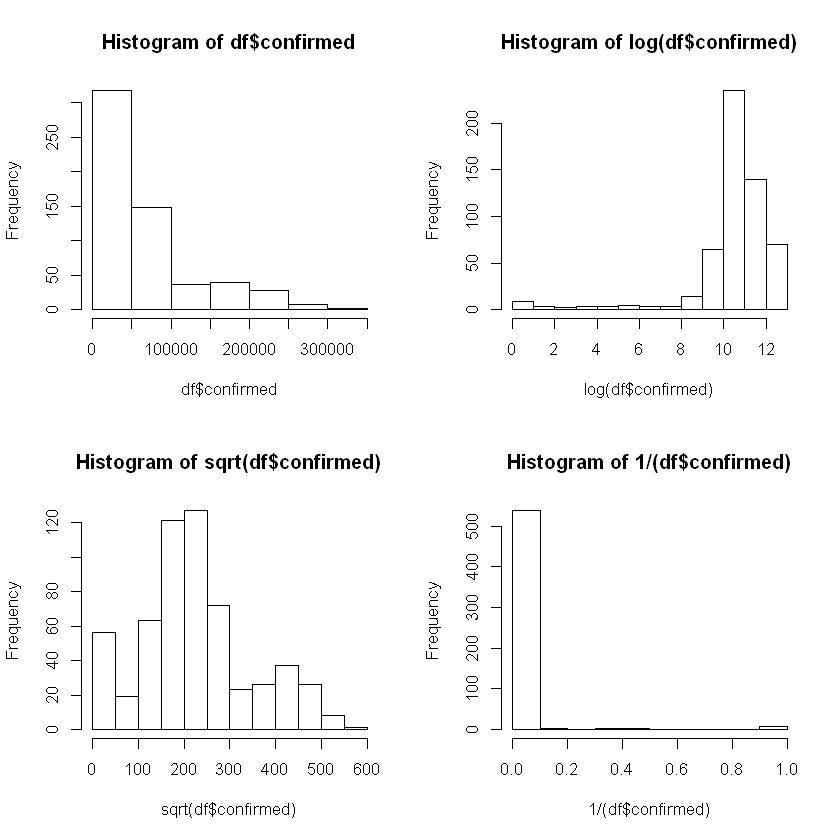

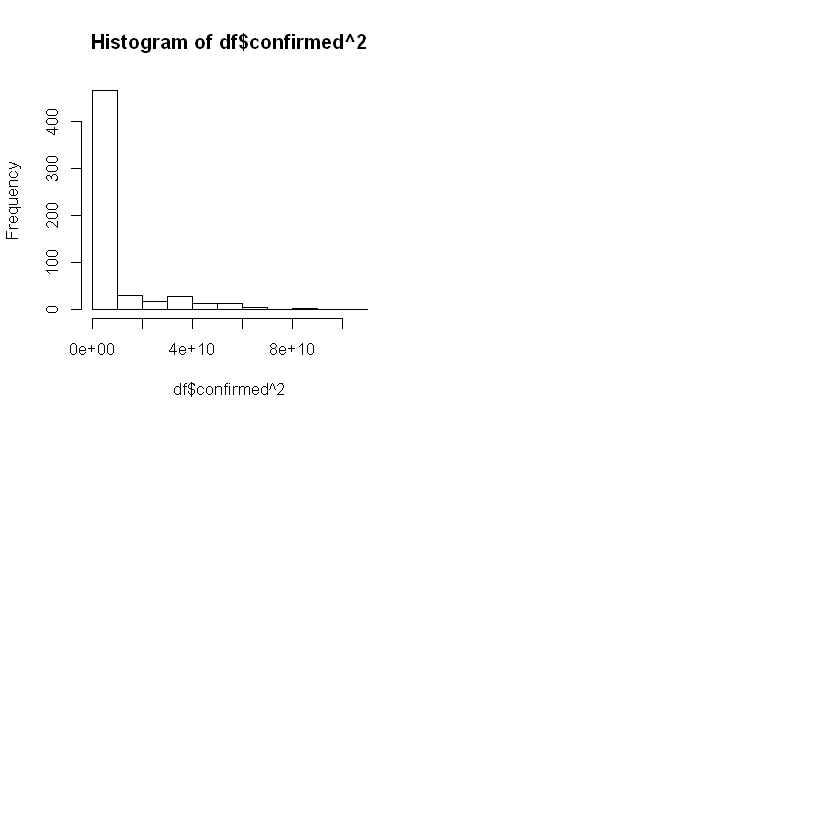

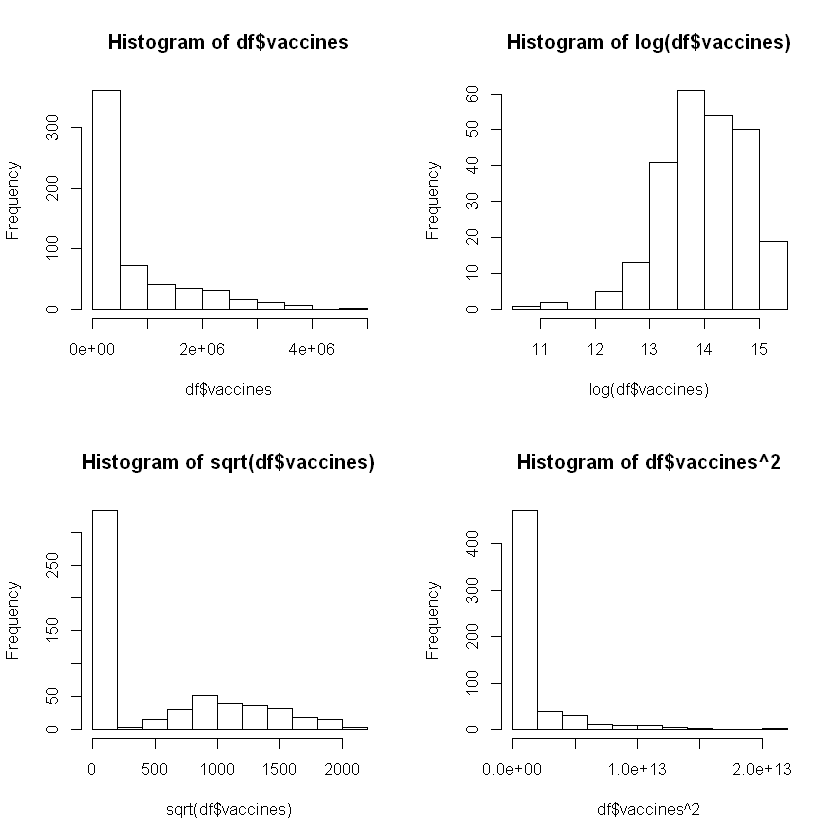

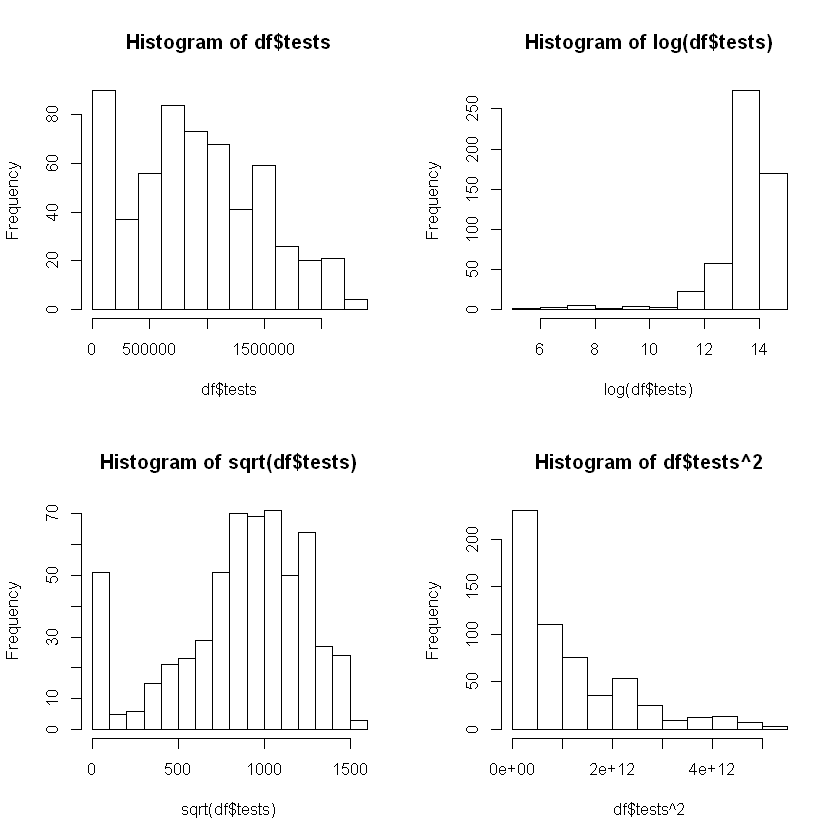

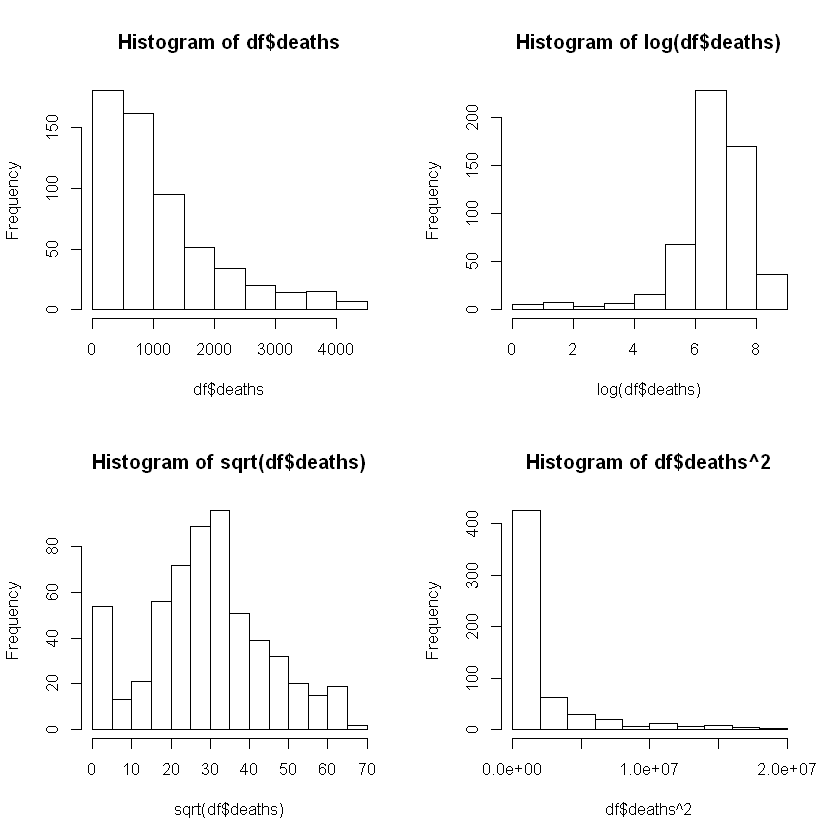

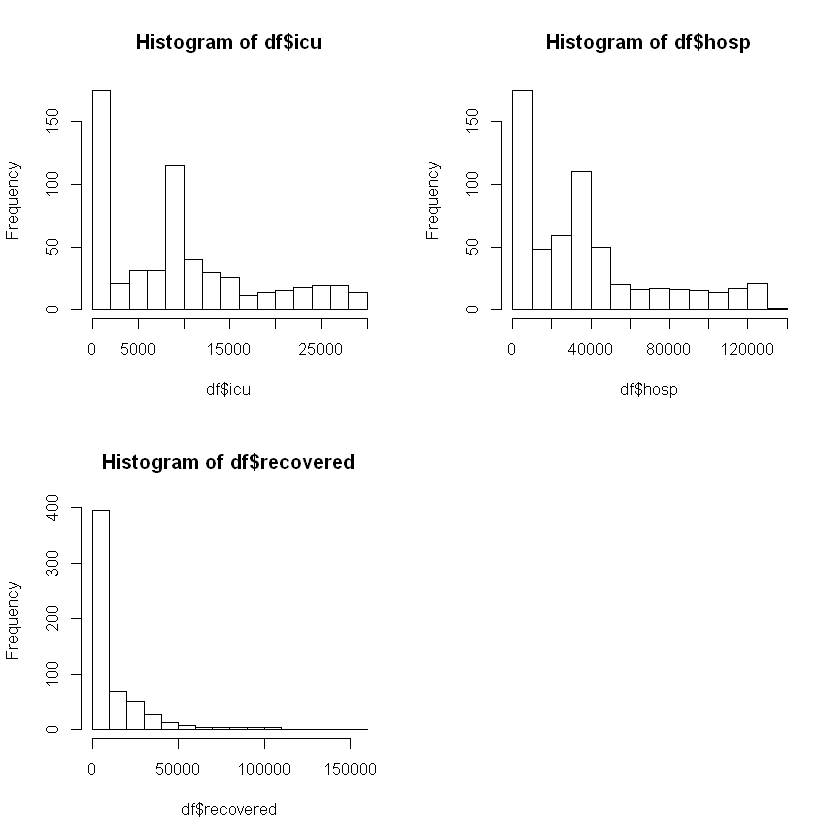

In [17]:
par(mfrow=c(2,2))
hist(df$confirmed)
hist(log(df$confirmed))
hist(sqrt(df$confirmed))
hist(1/(df$confirmed))
hist(df$confirmed^2) #<- den uparxei noima na to eksetasoume giati to df$confirmed, pou einai paromoio, einai kalutero gia ta sfalmata

par(mfrow=c(2,2))
hist(df$vaccines)
hist(log(df$vaccines))
hist(sqrt(df$vaccines))
hist(df$vaccines^2)

par(mfrow=c(2,2))
hist(df$tests)
hist(log(df$tests))
hist(sqrt(df$tests))
hist(df$tests^2)

par(mfrow=c(2,2))
hist(df$deaths)
hist(log(df$deaths))
hist(sqrt(df$deaths))
hist(df$deaths^2)

par(mfrow=c(2,2))
hist(df$icu)
hist(df$hosp)
hist(df$recovered)




In [18]:
# Set seed
set.seed(42)

####### katallilos metasximatismos ##########
df$confirmed<- sqrt(df$confirmed)
#df$tests<- sqrt(df$tests)
#df$deaths<- sqrt(df$deaths)


rows <- sample(nrow(df))

# Randomly order data
df <- df[rows,]

# Determine row to split on: split

split <- round(nrow(df) * .80)
# Create train
train <- df[1:split,]
dim(train)

# Create test
test <- df[(split + 1):nrow(df), ]

#Create train duplicate??? PROB me outliers
#train2<- train

### VGAZO TA ROWS APO 1 MEXRI 38 GIA TO LOG

########,
#train_log <- train_log[-c( 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38),]
#train_log <- train_log[-c( 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38),]


# Fit lm model on train: model
lm<- lm(confirmed ~., data=train )
summary(lm)

# Predict on test: p
p <- predict(lm, test)

# The reason for using predict() on test data is that, how well your model predicts on new data
# Reduce overfitting
# Compute errors: error
error <- p - test$confirmed

# Calculate RMSE (Root Mean Squared Error)
sqrt(mean(error^2))


[1] 463   7


Call:
lm(formula = confirmed ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-87.470 -32.304   0.365  24.788 211.596 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.128e+01  4.561e+00  15.627  < 2e-16 ***
vaccines    -5.246e-06  2.744e-06  -1.911   0.0566 .  
tests        8.370e-05  7.579e-06  11.044  < 2e-16 ***
recovered    5.012e-04  1.271e-04   3.943 9.32e-05 ***
deaths       2.013e-02  3.332e-03   6.041 3.18e-09 ***
hosp         2.539e-03  5.885e-04   4.314 1.97e-05 ***
icu         -4.064e-03  2.476e-03  -1.641   0.1014    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 46.71 on 456 degrees of freedom
Multiple R-squared:  0.8629,	Adjusted R-squared:  0.8611 
F-statistic: 478.3 on 6 and 456 DF,  p-value: < 2.2e-16


[1] 41.36855

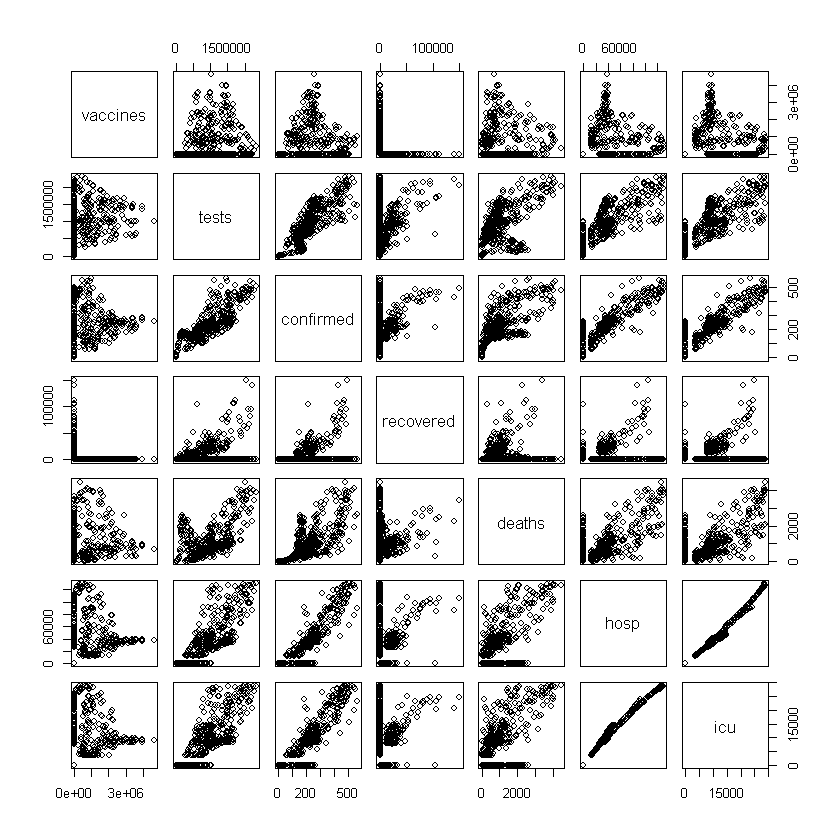

In [19]:
plot(train)

In [20]:
error

58         565         541         440         140         508 
 10.7584114  72.9398886  -2.4081943 -71.6230080   4.0382477  43.5227056 
        219         256         501         534         154         104 
 18.7442426  -4.8202342  28.4997869  11.7788051 -43.8999218 -31.6281855 
        366         413         456         306         415         277 
 62.8533900  43.0220939  23.9411990 -44.4572392  18.7376693 -26.5082001 
        263         363         375         129           8         497 
 -2.3552686  19.3543788   3.8172390 -13.5597657  70.2761266  13.0559542 
        535         175         221         237         346         270 
-64.9869078 -78.5482329   0.6548139  -0.2060723  19.1318185   1.8585385 
        455         164         241         289         361         205 
 24.7821390 -70.5729088  11.3433714 -26.1953350  11.8214759  11.8653744 
        494         335         291         359         183         414 
 35.0028867 -25.1759391 -39.8499203  56.5322110   3.8300468  41.5082960 
         13          18           5         218         177         380 
 69.5440758  71.2761266  69.5440758  25.9117933 -33.4663449  79.1543241 
        209          77          19         502         498         236 
 13.2100174 -36.2782093  71.2776300  46.6354337  66.6156139 -11.3441048 
        503         145         393         304         425         450 
 21.8869044 -22.2413269  67.0048029  -5.6085568 -15.9609108 -16.7492462 
        578         447         536         155         151           7 
 51.8739236 -49.3576467  37.9702034 -34.8056274 -42.9273214  71.2761266 
        227          50         160          92         519          64 
 -3.6700522  52.6757617 -58.4885942 -28.1555392  44.5278999 -22.2781019 
        365         334          44         511          99         266 
 93.3577706 -44.1892382  62.6218212  53.2406609 -16.0471932   3.6852397 
        496         264         420         567         417         349 
 45.7241539 -21.0894238  31.5426525 -15.9606019 -23.8396189   8.8596233 
        143         302         230         275         144         295 
-14.4894228  19.6204212   3.5163070  11.4058408 -23.5154238 -16.0207918 
        200         216         176          21         499         320 
-10.6098623   2.0737471 -21.7314727  70.2761266  47.5581232 -39.4273084 
        475          65          36         290         438          29 
 -8.1839894 -42.9998997  71.2761266 -27.1646562 -50.7906887  71.2761266 
         96         234         322          71         468         210 
-45.3560854  10.0142457   8.0079091 -69.2087483 -26.0236048  25.2082722 
        323           4         120         448         538         381 
 57.6066036  71.2761266  -8.0902001  -9.3789761 -40.5065076  48.9819296 
        391           9 
 10.4845371  71.2761266

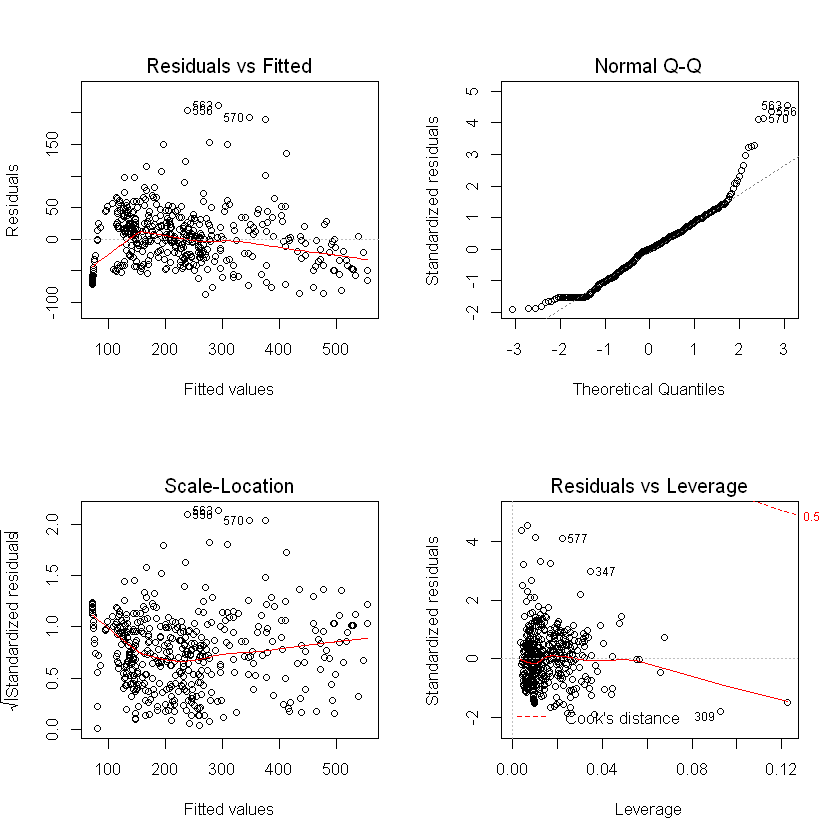

In [21]:
par(mfrow=c(2,2))
plot(lm)


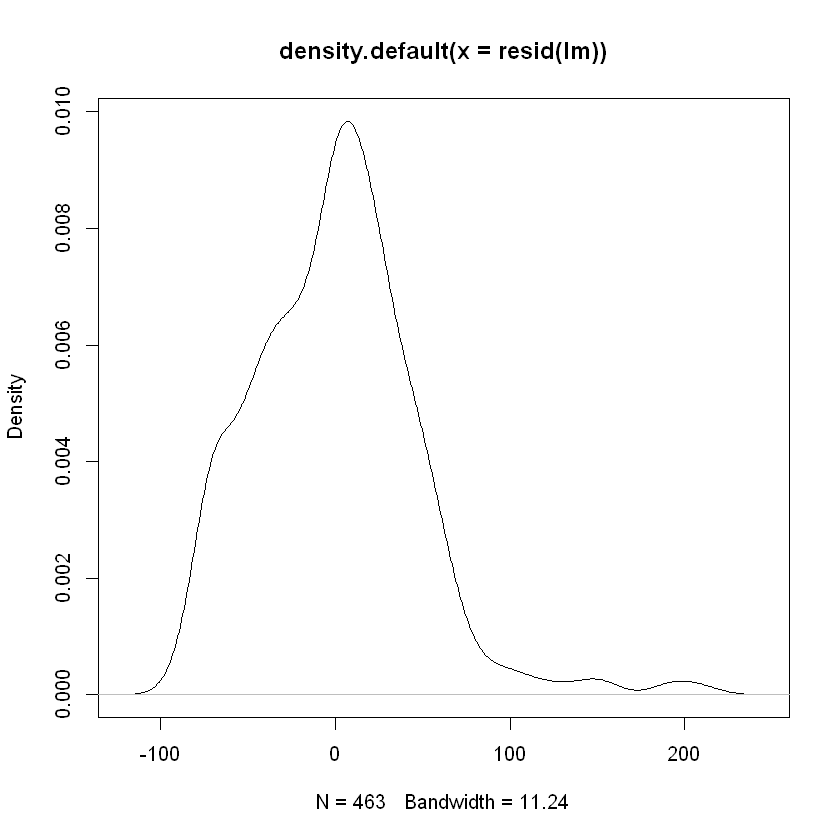

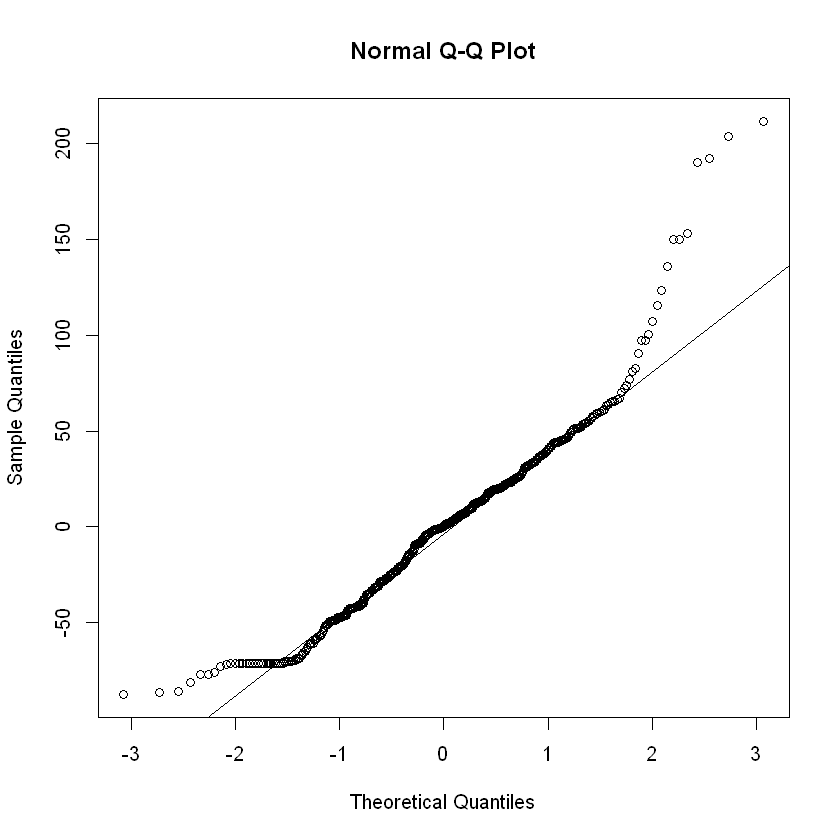

In [22]:
#resid(lm) #List of residuals
plot(density(resid(lm))) #A density plot
qqnorm(resid(lm)) # A quantile normal plot - good for checking normality
qqline(resid(lm))

In [23]:
#Shapiro-Wilk test can be performed as follow:
#Null hypothesis: the data are normally distributed
#Alternative hypothesis: the data are not normally distributed

# Shapiro-Wilk normality test for mpg
shapiro.test(resid(lm)) # => p = 0.1229
# Shapiro-Wilk normality test for wt
#shapiro.test(df$confirmed) # => p = 0.09


	Shapiro-Wilk normality test

data:  resid(lm)
W = 0.94825, p-value = 1.211e-11


In [24]:
#load car package
library(car)

#perform Durbin-Watson test
durbinWatsonTest(lm)


Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"

 lag Autocorrelation D-W Statistic p-value
   1     -0.07211928      2.142103   0.106
 Alternative hypothesis: rho != 0

In [25]:
#library(MASS)
# Stepwise regression model
#step.model <- stepAIC(lm, direction = "both", 
#                      trace = FALSE)

In [26]:
#summary(step.model)

In [27]:
#steplm<-step(lm)
#summary(steplm)
step(lm(confirmed~.,data=train),direction="both")
step(lm(confirmed~.,data=train),direction="forward")
step(lm(confirmed~.,data=train),direction="backward")

Start:  AIC=3566.37
confirmed ~ vaccines + tests + recovered + deaths + hosp + icu

            Df Sum of Sq     RSS    AIC
<none>                    994734 3566.4
- icu        1      5877 1000611 3567.1
- vaccines   1      7970 1002704 3568.1
- recovered  1     33911 1028645 3579.9
- hosp       1     40595 1035329 3582.9
- deaths     1     79612 1074346 3600.0
- tests      1    266068 1260802 3674.1



Call:
lm(formula = confirmed ~ vaccines + tests + recovered + deaths + 
    hosp + icu, data = train)

Coefficients:
(Intercept)     vaccines        tests    recovered       deaths         hosp  
  7.128e+01   -5.246e-06    8.370e-05    5.012e-04    2.013e-02    2.539e-03  
        icu  
 -4.064e-03  


Start:  AIC=3566.37
confirmed ~ vaccines + tests + recovered + deaths + hosp + icu




Call:
lm(formula = confirmed ~ vaccines + tests + recovered + deaths + 
    hosp + icu, data = train)

Coefficients:
(Intercept)     vaccines        tests    recovered       deaths         hosp  
  7.128e+01   -5.246e-06    8.370e-05    5.012e-04    2.013e-02    2.539e-03  
        icu  
 -4.064e-03  


Start:  AIC=3566.37
confirmed ~ vaccines + tests + recovered + deaths + hosp + icu

            Df Sum of Sq     RSS    AIC
<none>                    994734 3566.4
- icu        1      5877 1000611 3567.1
- vaccines   1      7970 1002704 3568.1
- recovered  1     33911 1028645 3579.9
- hosp       1     40595 1035329 3582.9
- deaths     1     79612 1074346 3600.0
- tests      1    266068 1260802 3674.1



Call:
lm(formula = confirmed ~ vaccines + tests + recovered + deaths + 
    hosp + icu, data = train)

Coefficients:
(Intercept)     vaccines        tests    recovered       deaths         hosp  
  7.128e+01   -5.246e-06    8.370e-05    5.012e-04    2.013e-02    2.539e-03  
        icu  
 -4.064e-03  


In [28]:
library(car)
vif(lm)

vaccines     tests recovered    deaths      hosp       icu 
 1.509471  4.039700  1.516530  2.173082 94.593796 92.989943

In [29]:
#car::vif(lm)
#vaccines
#6.63086928317524
#tests
#21.8038260391454
#recovered
#1.56626828577337
#deaths
#23.1649153116175
#hosp
#102.535743563204
#icu
#106.203890278381

In [30]:
install.packages("gvlma")
library(gvlma)

package 'gvlma' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpikCC5w\downloaded_packages


In [31]:
gvmodel<- gvlma(lm)
summary(gvmodel)


Call:
lm(formula = confirmed ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-87.470 -32.304   0.365  24.788 211.596 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.128e+01  4.561e+00  15.627  < 2e-16 ***
vaccines    -5.246e-06  2.744e-06  -1.911   0.0566 .  
tests        8.370e-05  7.579e-06  11.044  < 2e-16 ***
recovered    5.012e-04  1.271e-04   3.943 9.32e-05 ***
deaths       2.013e-02  3.332e-03   6.041 3.18e-09 ***
hosp         2.539e-03  5.885e-04   4.314 1.97e-05 ***
icu         -4.064e-03  2.476e-03  -1.641   0.1014    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 46.71 on 456 degrees of freedom
Multiple R-squared:  0.8629,	Adjusted R-squared:  0.8611 
F-statistic: 478.3 on 6 and 456 DF,  p-value: < 2.2e-16


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = lm) 

                

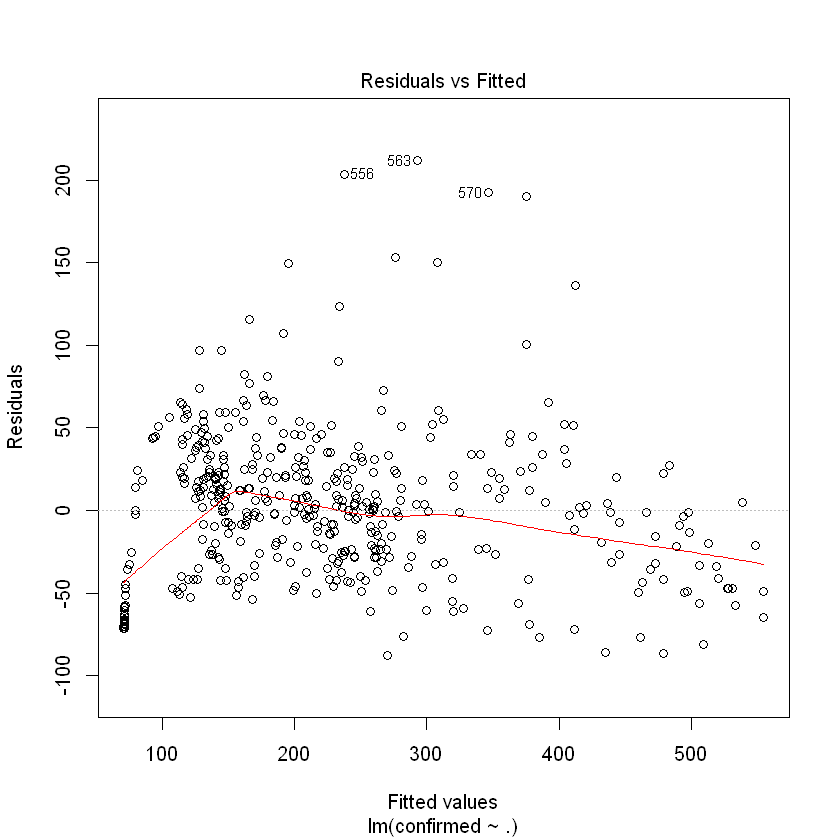

In [32]:

plot(lm, 1)

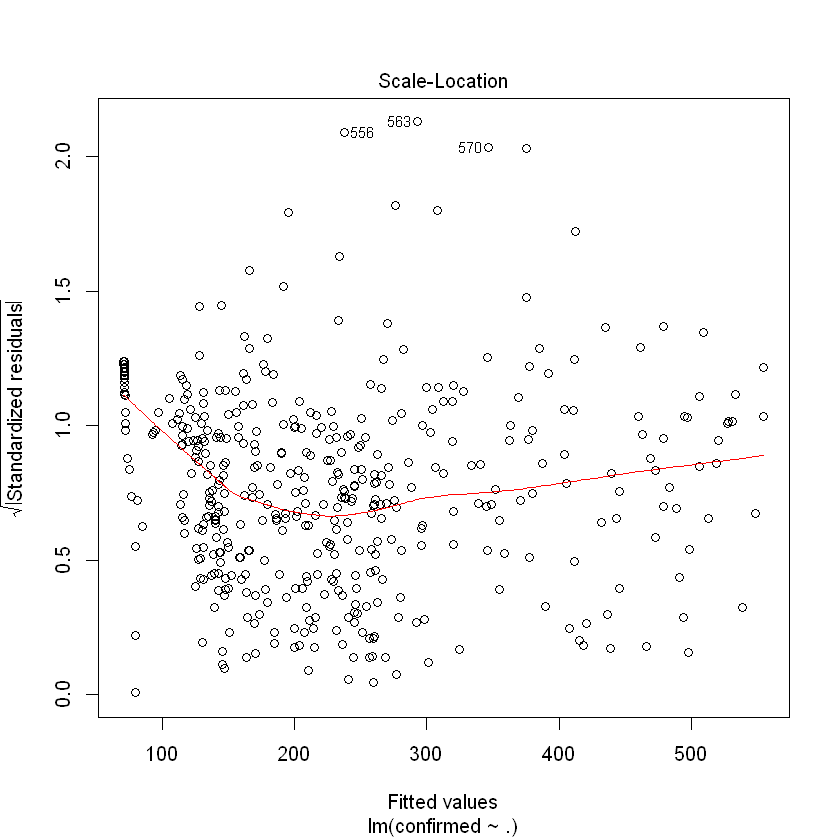

In [33]:
plot(lm, 3)

In [34]:
#cooksd <- cooks.distance(lm)

#plot(cooksd, pch="*", cex=2, main="Influential Obs by Cooks distance")  # plot cook's distance
#abline(h = 4*mean(cooksd, na.rm=T), col="red")  # add cutoff line
#text(x=1:length(cooksd)+1, y=cooksd, labels=ifelse(cooksd>4*mean(cooksd, na.rm=T),names(cooksd),""), col="red")  # add labels

    rstudent unadjusted p-value Bonferroni p
563 4.647221         4.4126e-06    0.0020430
556 4.456208         1.0516e-05    0.0048687
570 4.215464         3.0079e-05    0.0139270
577 4.193652         3.3004e-05    0.0152810

563 556 
 45 205

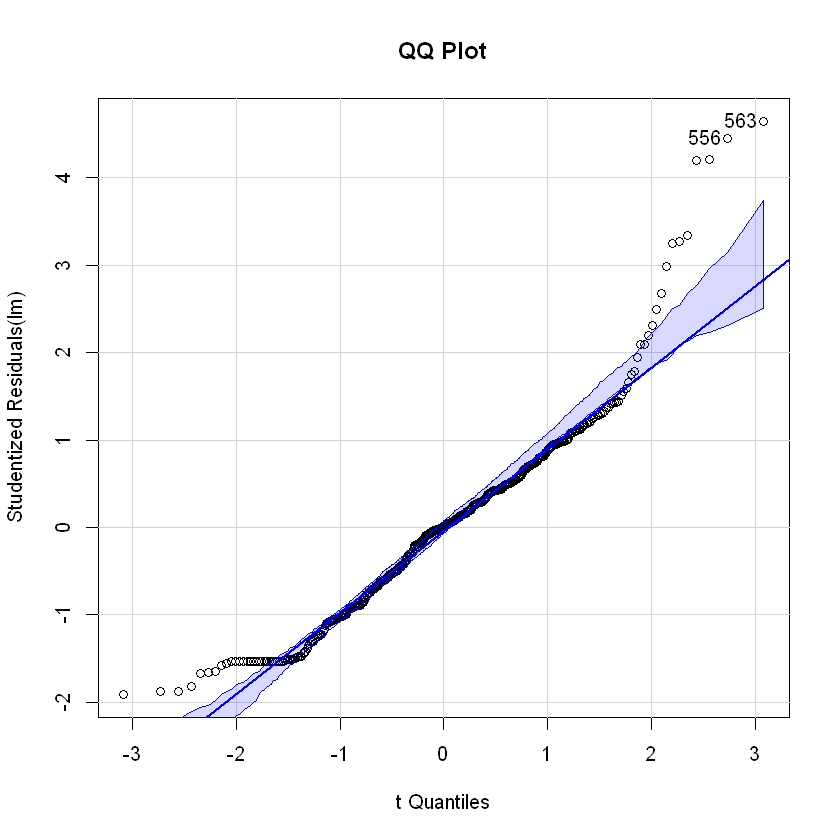

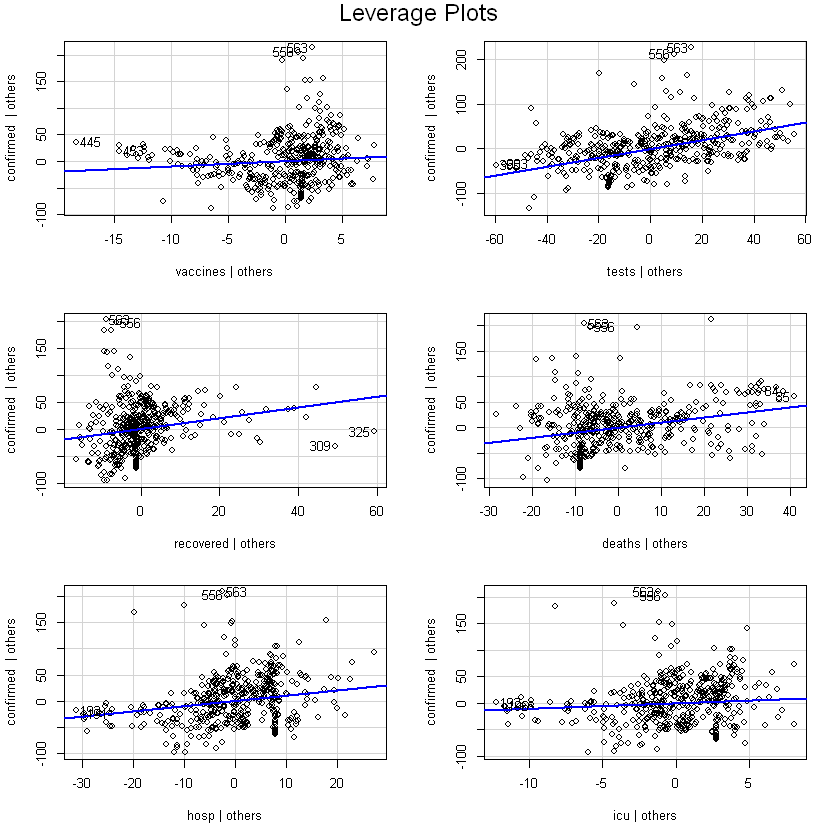

In [35]:
# Assessing Outliers
outlierTest(lm) # Bonferonni p-value for most extreme obs
qqPlot(lm, main="QQ Plot") #qq plot for studentized resid
leveragePlots(lm) # leverage plots

563 556 
 45 205

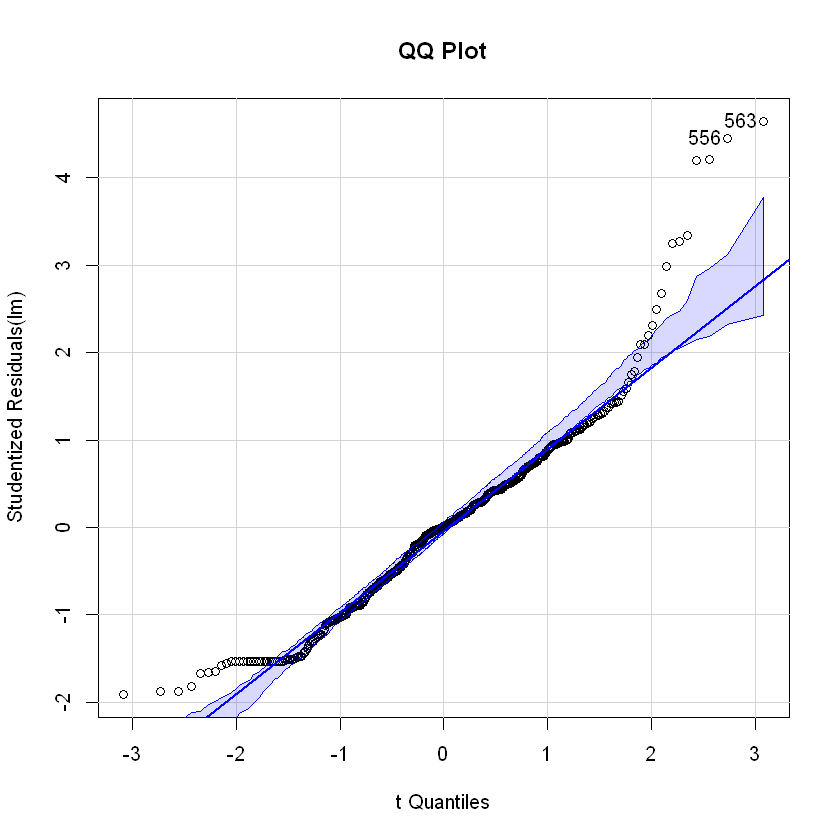

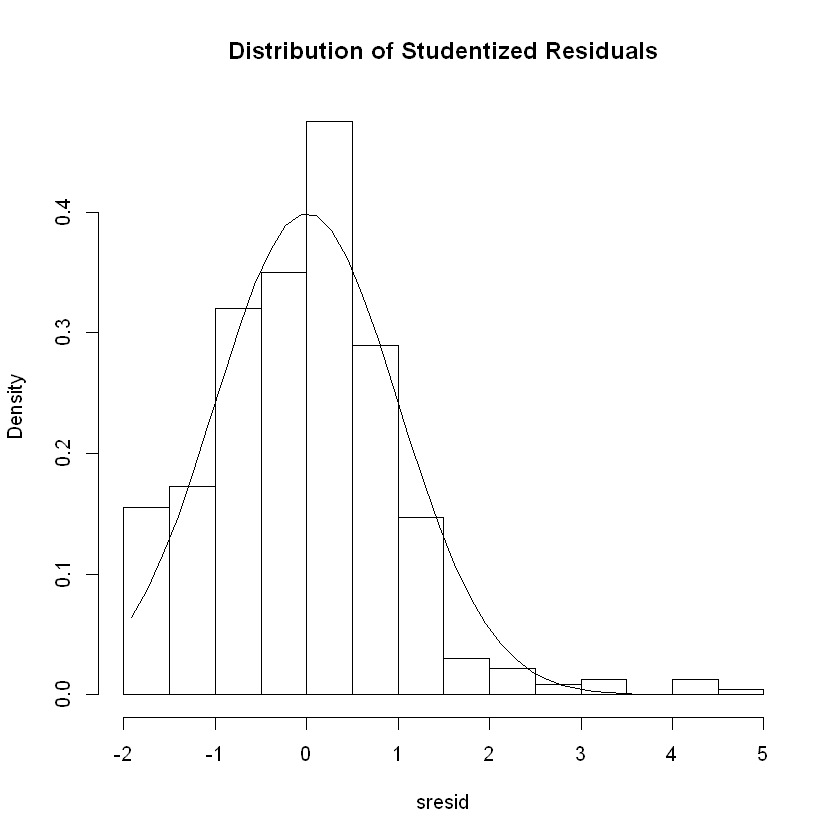

In [36]:
# Normality of Residuals
# qq plot for studentized resid
qqPlot(lm, main="QQ Plot")
# distribution of studentized residuals
library(MASS)
sresid <- studres(lm)
hist(sresid, freq=FALSE,
   main="Distribution of Studentized Residuals")
xfit<-seq(min(sresid),max(sresid),length=40)
yfit<-dnorm(xfit)
lines(xfit, yfit)

In [37]:
# Evaluate homoscedasticity
# non-constant error variance test
ncvTest(lm)
# plot studentized residuals vs. fitted values
#spreadLevelPlot(lm)
#uparxei homoskedasticity

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.2582761, Df = 1, p = 0.61131

In [38]:
# Evaluate Nonlinearity
# component + residual plot
#crPlots(lm)
# Ceres plots
#ceresPlots(lm)

In [39]:
#plot(train)

Warning message in plot.window(...):
""id.method" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""id.method" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""id.method" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""id.method" is not a graphical parameter"Warning message in box(...):
""id.method" is not a graphical parameter"Warning message in title(...):
""id.method" is not a graphical parameter"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""id.method" is not a graphical parameter"

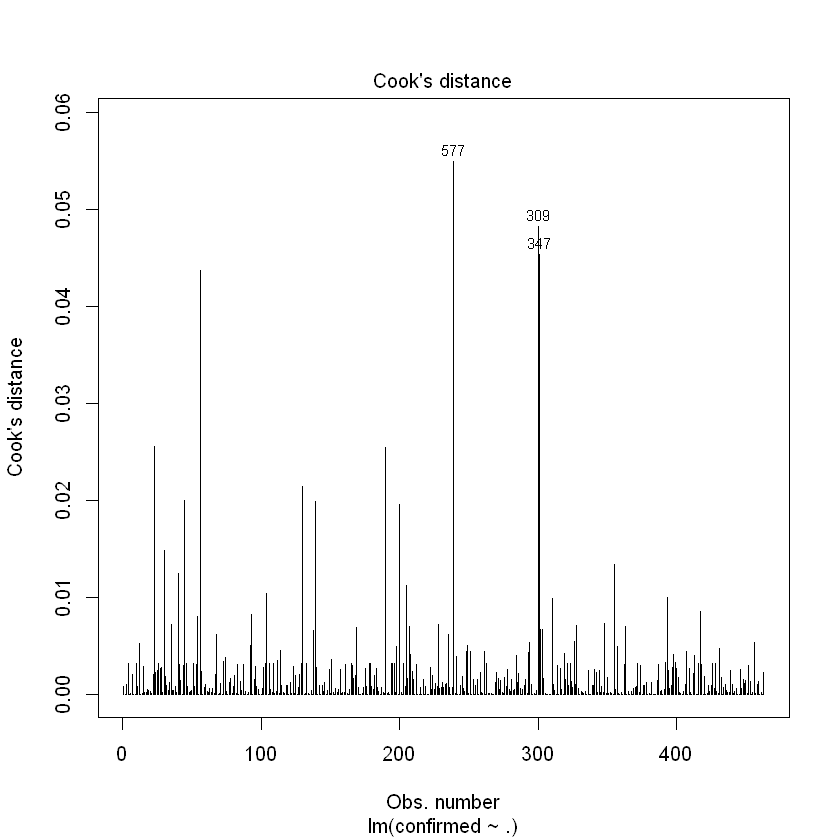

,StudRes,Hat,CookD
563,4.647221,0.006719904,0.01997073
325,-1.482277,0.122400845,0.04366269
556,4.456208,0.004109716,0.01124176
577,4.193652,0.022159984,0.05493785
309,-1.823450,0.092648062,0.04825490


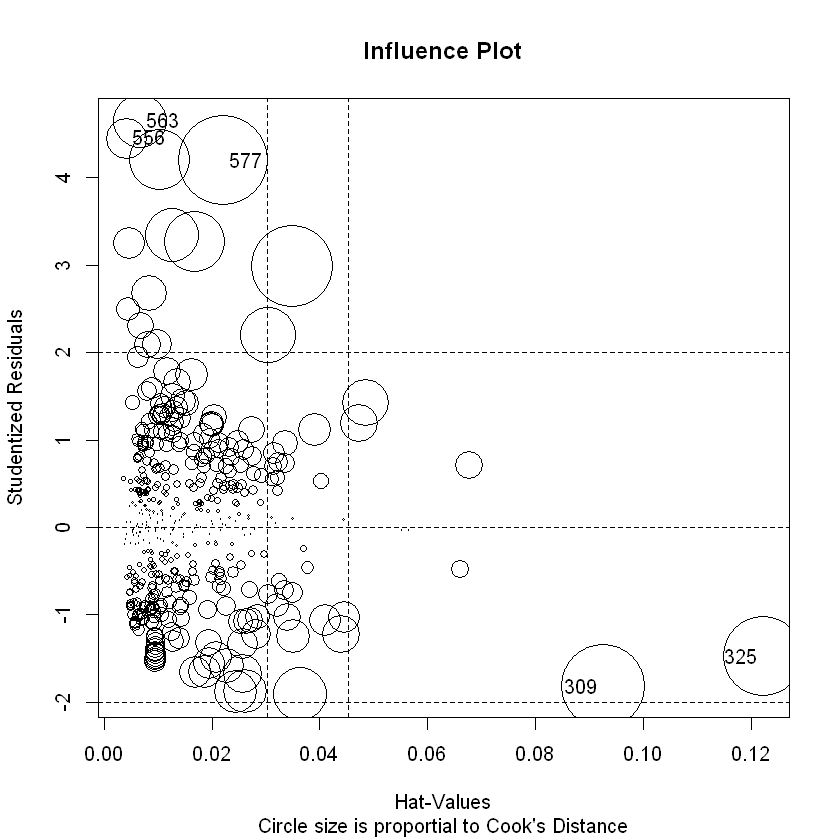

In [40]:

# Influential Observations
# Cook's D plot
# identify D values > 4/(n-k-1)
#cutoff <- 4/((nrow(train)-length(train$coefficients)-2))
plot(lm, which=4)
# Influence Plot
influencePlot(lm, id.method="identify", main="Influence Plot", sub="Circle size is proportial to Cook's Distance" )

In [41]:


#bc<-boxcox(lm, plotit = TRUE)


In [42]:
#str(bc) # numbers that make up the graph
#(bc.power <- bc$x[which.max(bc$y)])

In [43]:
#train2 <-train

In [44]:
#train <- train[-c(309,325,556,563,567,587), ]

In [45]:
train <- subset(train, select= -c(icu))
dim(train)

[1] 461   6

In [46]:
lm2<- lm(confirmed ~., data=train )
summary(lm2)

# Predict on test: p
p2 <- predict(lm2, test)

# The reason for using predict() on test data is that, how well your model predicts on new data
# Reduce overfitting
# Compute errors: error
error2 <- p - test$confirmed
# Calculate RMSE (Root Mean Squared Error)
sqrt(mean(error2^2))


Call:
lm(formula = confirmed ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-93.455 -33.783  -0.466  25.940 210.307 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.861e+01  4.258e+00  16.112  < 2e-16 ***
vaccines    -5.217e-06  2.754e-06  -1.894 0.058842 .  
tests        8.122e-05  7.443e-06  10.912  < 2e-16 ***
recovered    4.848e-04  1.270e-04   3.816 0.000154 ***
deaths       2.209e-02  3.125e-03   7.068 5.93e-12 ***
hosp         1.588e-03  1.071e-04  14.828  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 46.86 on 455 degrees of freedom
Multiple R-squared:  0.8623,	Adjusted R-squared:  0.8608 
F-statistic: 569.8 on 5 and 455 DF,  p-value: < 2.2e-16


[1] 41.36855

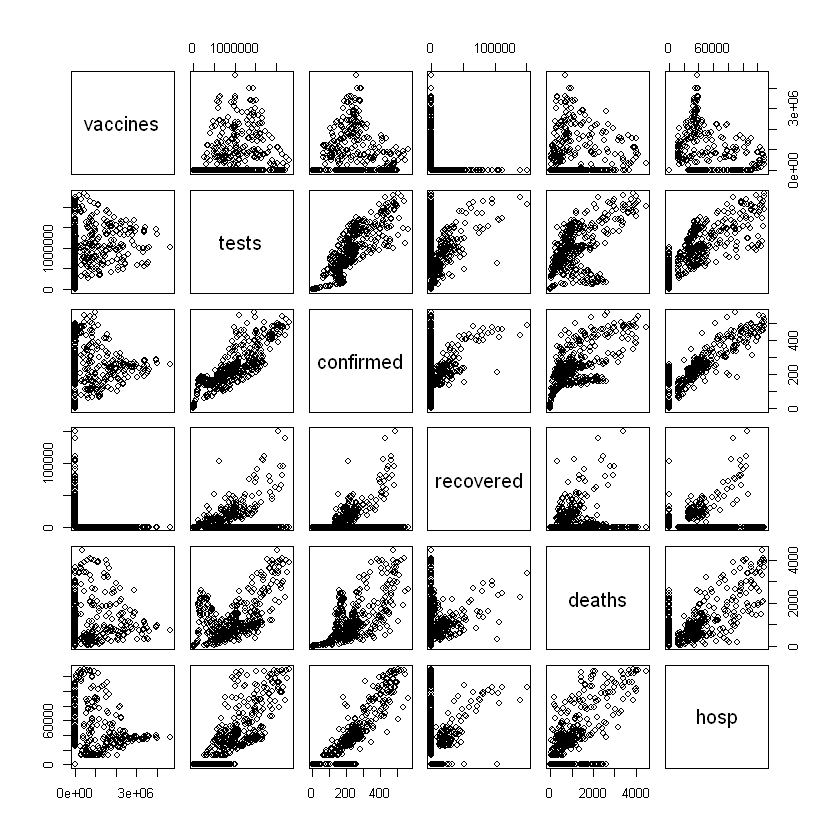

In [47]:
plot(train)

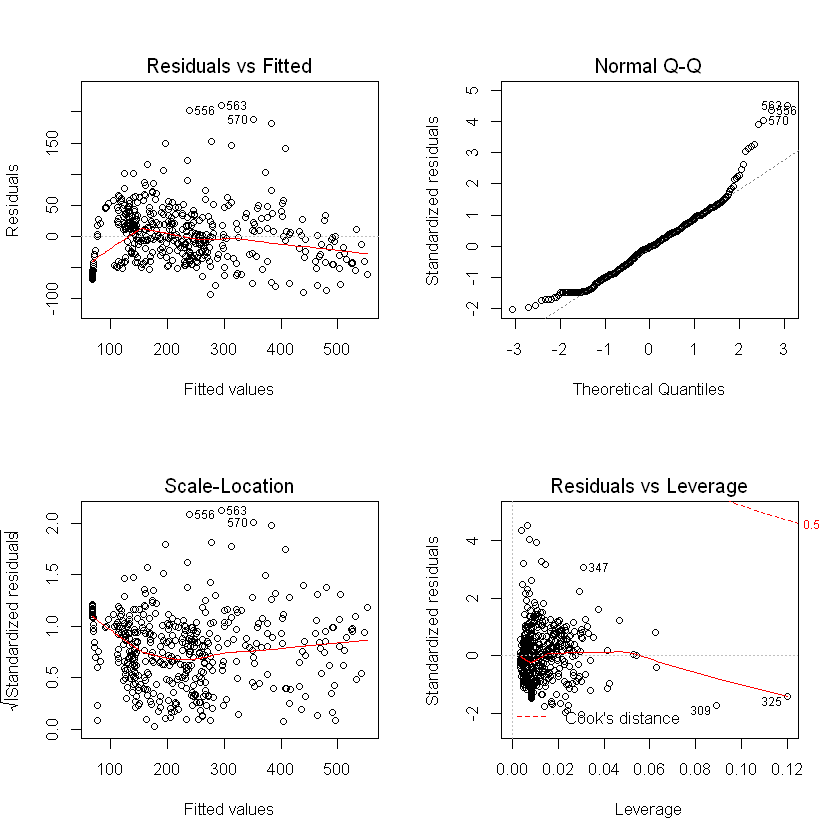

In [48]:
par(mfrow=c(2,2))
plot(lm2)

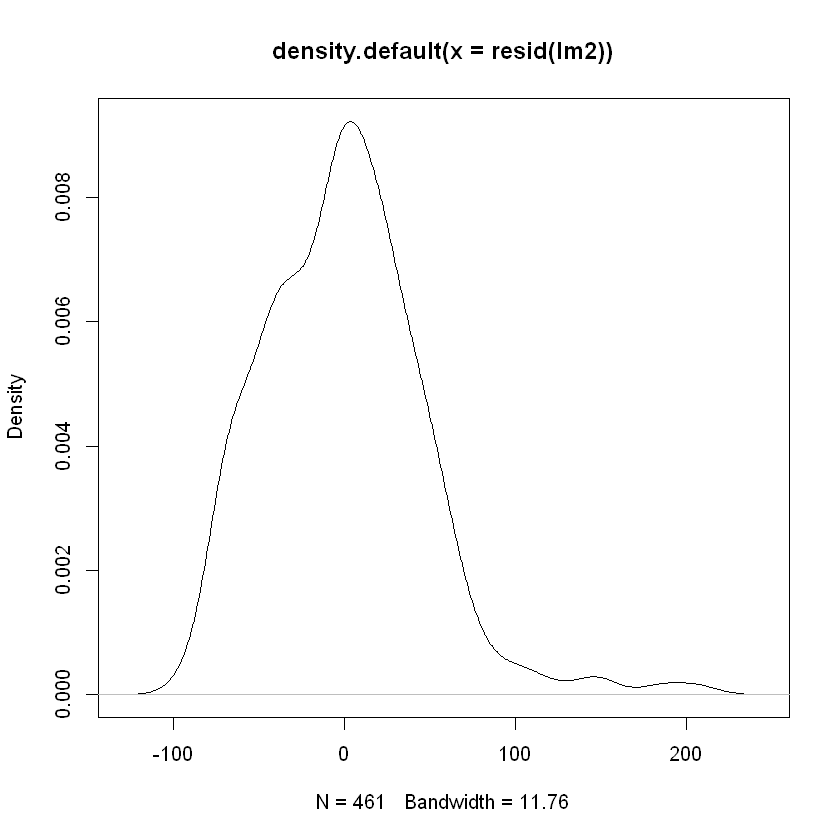

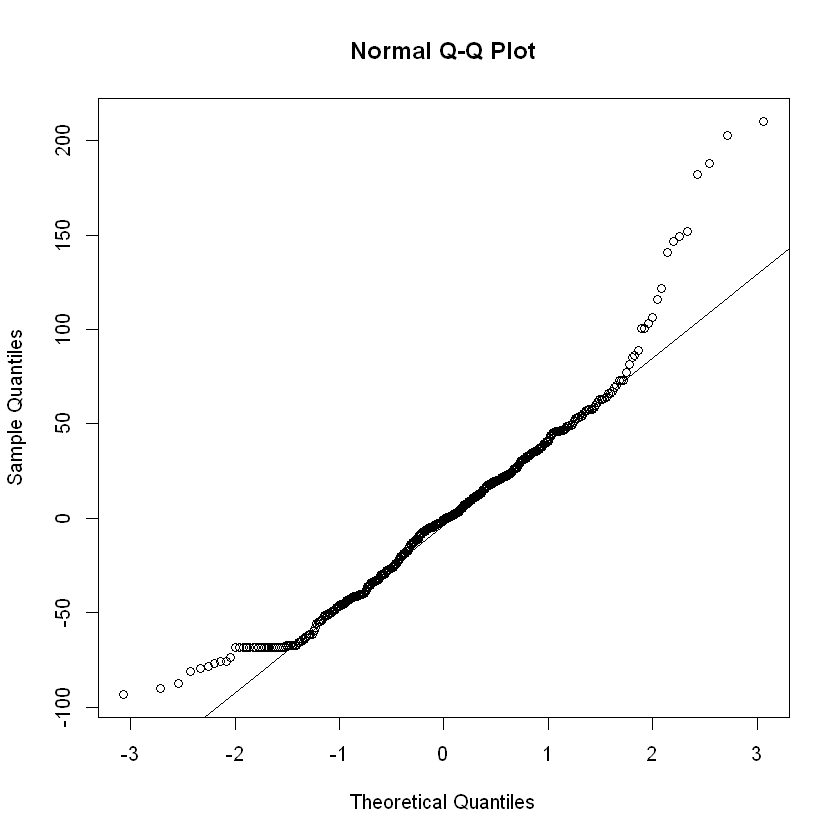

In [49]:
#resid(lm) #List of residuals
plot(density(resid(lm2))) #A density plot
qqnorm(resid(lm2)) # A quantile normal plot - good for checking normality
qqline(resid(lm2))

In [50]:
shapiro.test(resid(lm2)) # => p = 0.1229

durbinWatsonTest(lm2)

vif(lm2)



	Shapiro-Wilk normality test

data:  resid(lm2)
W = 0.95302, p-value = 6.149e-11


 lag Autocorrelation D-W Statistic p-value
   1     -0.06422023      2.126132   0.184
 Alternative hypothesis: rho != 0

vaccines     tests recovered    deaths      hosp 
 1.507409  3.870144  1.501708  1.898466  3.111352

In [51]:
gvmodel2<- gvlma(lm2)
summary(gvmodel2)




Call:
lm(formula = confirmed ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-93.455 -33.783  -0.466  25.940 210.307 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.861e+01  4.258e+00  16.112  < 2e-16 ***
vaccines    -5.217e-06  2.754e-06  -1.894 0.058842 .  
tests        8.122e-05  7.443e-06  10.912  < 2e-16 ***
recovered    4.848e-04  1.270e-04   3.816 0.000154 ***
deaths       2.209e-02  3.125e-03   7.068 5.93e-12 ***
hosp         1.588e-03  1.071e-04  14.828  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 46.86 on 455 degrees of freedom
Multiple R-squared:  0.8623,	Adjusted R-squared:  0.8608 
F-statistic: 569.8 on 5 and 455 DF,  p-value: < 2.2e-16


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = lm2) 

                     Value   p-value                   Decision
Global

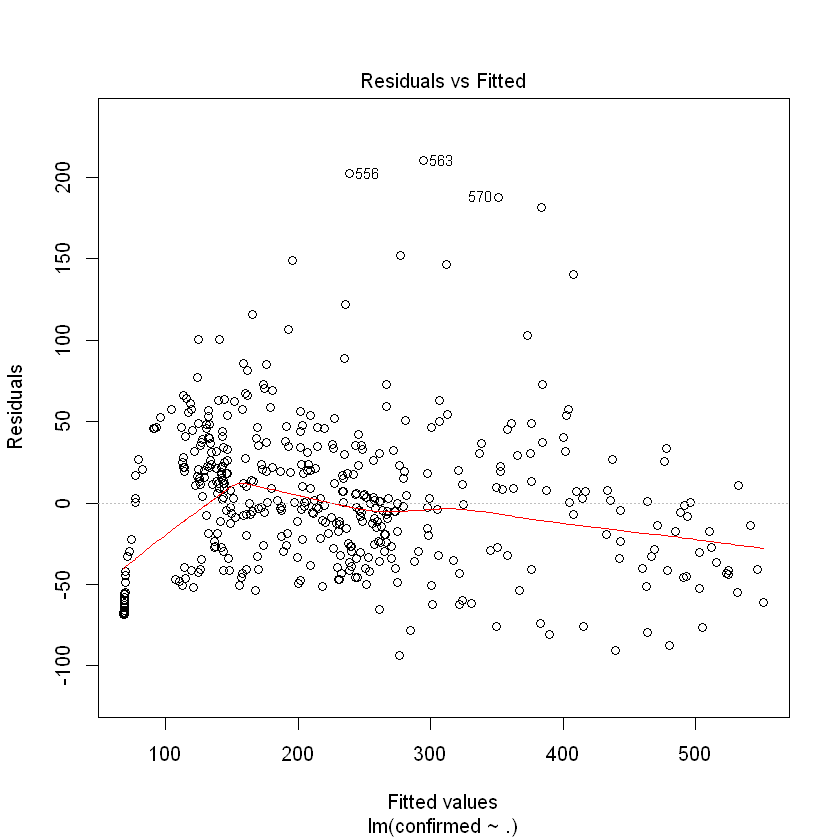

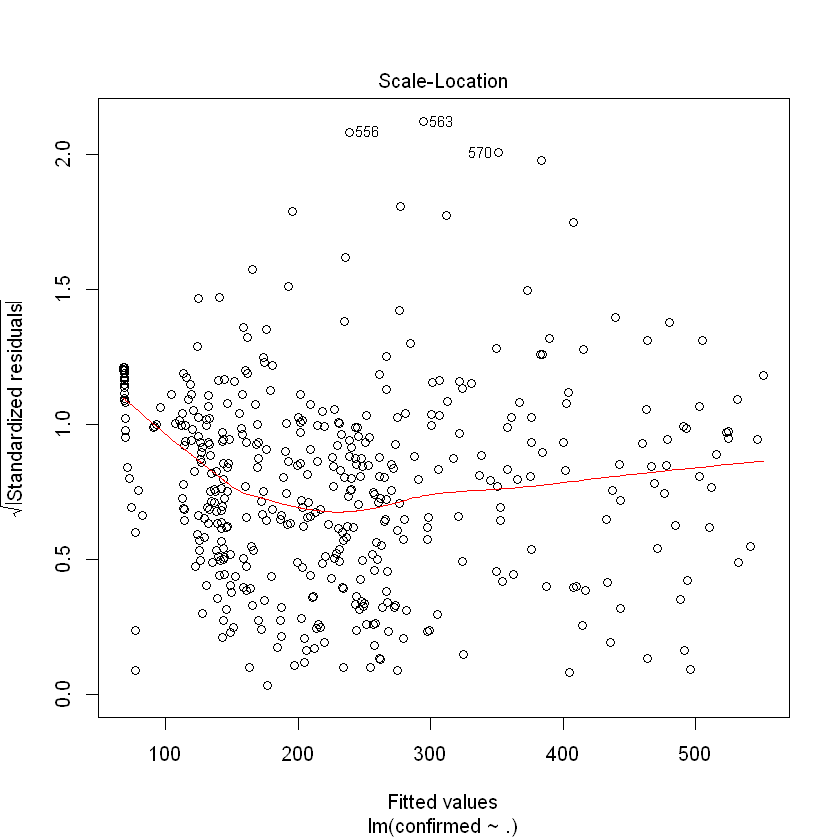

In [52]:
plot(lm2, 1)
plot(lm2, 3)


    rstudent unadjusted p-value Bonferroni p
563 4.601355         5.4538e-06    0.0025142
556 4.422496         1.2225e-05    0.0056355
570 4.097403         4.9487e-05    0.0228140
577 3.966294         8.4802e-05    0.0390940

563 556 
 45 205

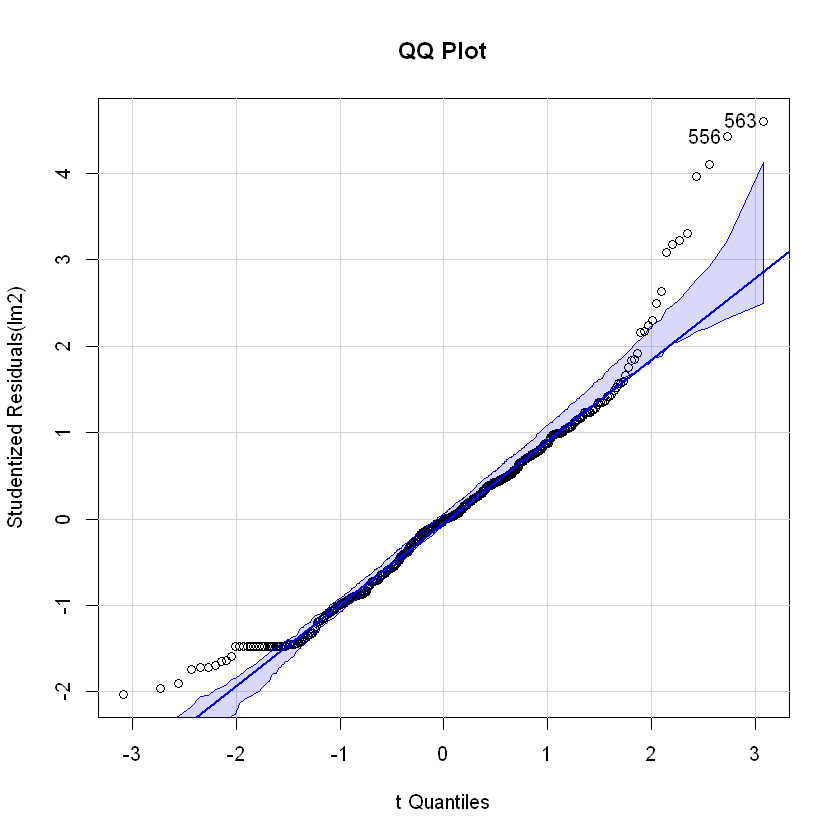

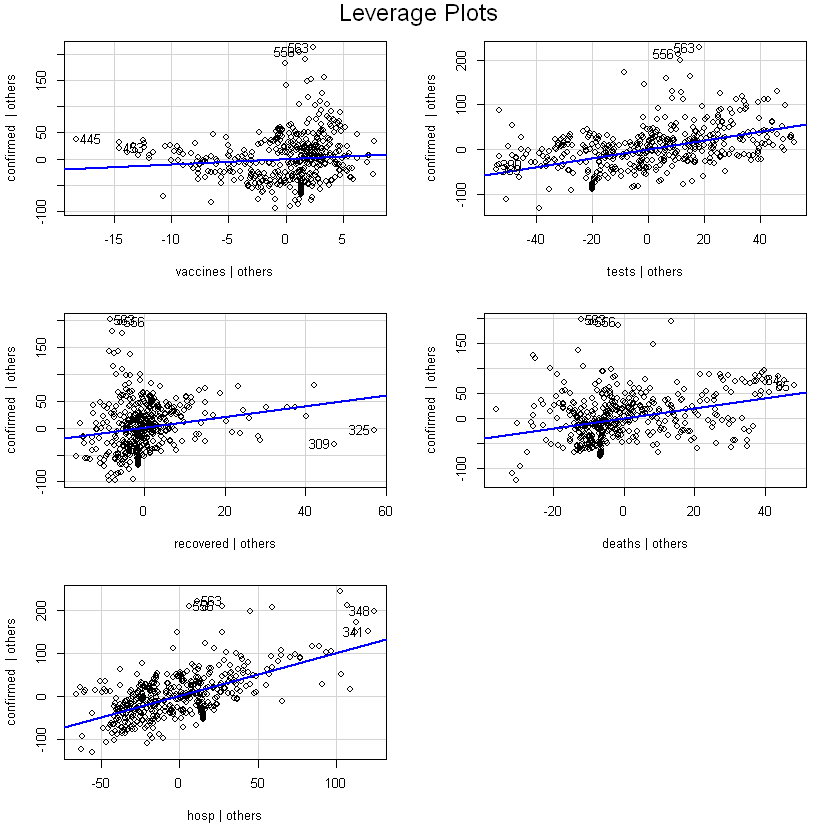

In [53]:
outlierTest(lm2) # Bonferonni p-value for most extreme obs
qqPlot(lm2, main="QQ Plot") #qq plot for studentized resid
leveragePlots(lm2) # leverage plots

Warning message in plot.window(...):
""id.method" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""id.method" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""id.method" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""id.method" is not a graphical parameter"Warning message in box(...):
""id.method" is not a graphical parameter"Warning message in title(...):
""id.method" is not a graphical parameter"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""id.method" is not a graphical parameter"

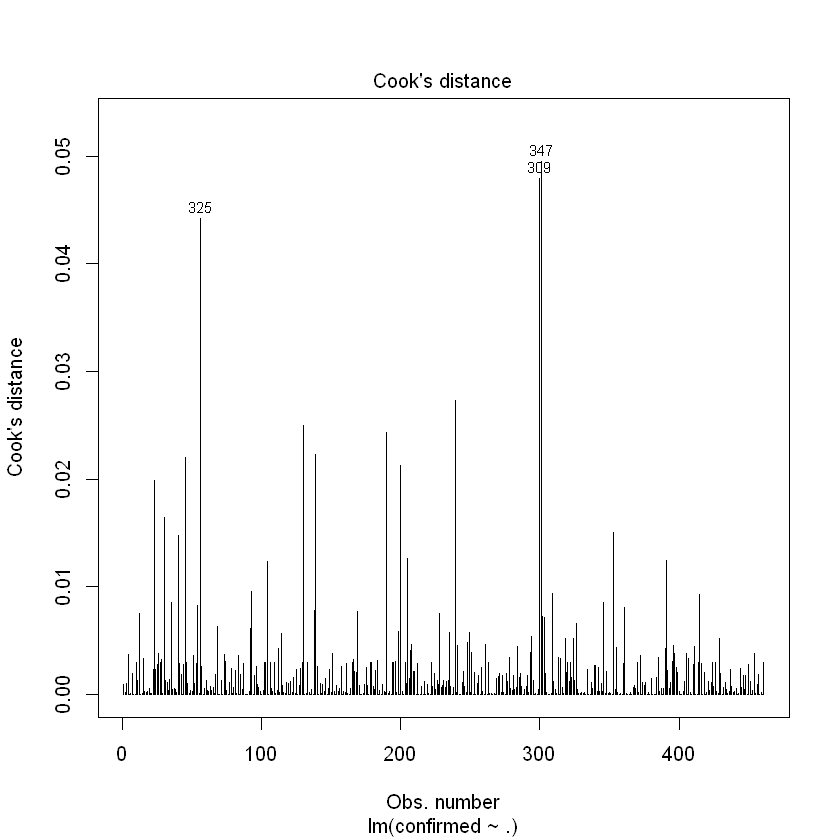

,StudRes,Hat,CookD
563,4.601355,0.006475683,0.02202356
325,-1.397126,0.119938474,0.04424436
556,4.422496,0.004020087,0.01264172
309,-1.718983,0.089039429,0.04793056
347,3.078255,0.030949017,0.04951568


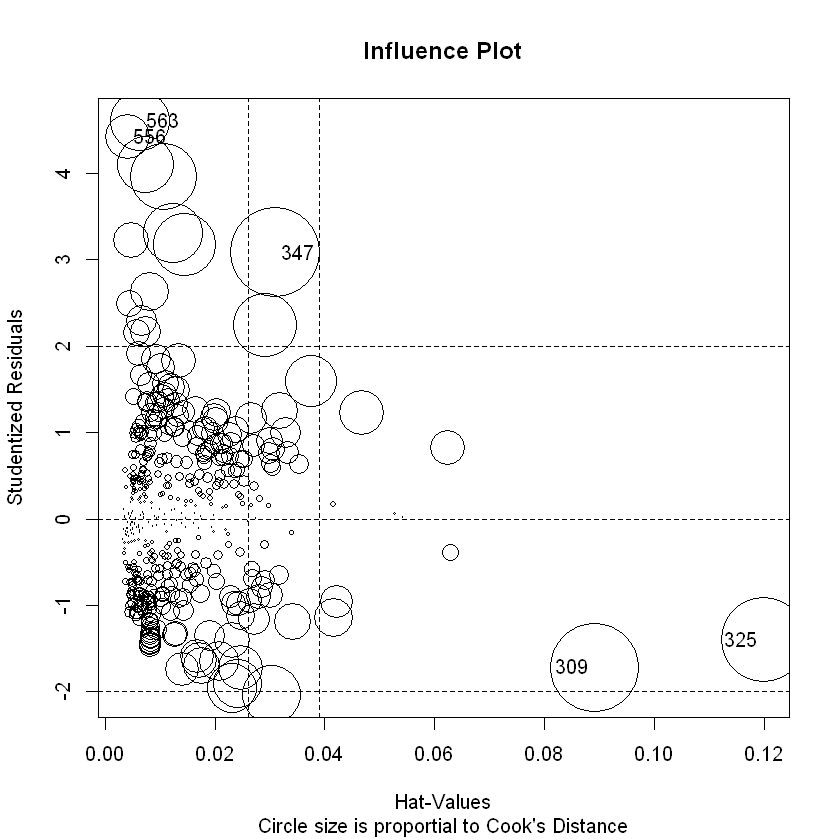

In [54]:
# Influential Observations
# Cook's D plot
# identify D values > 4/(n-k-1)
#cutoff <- 4/((nrow(train)-length(train$coefficients)-2))
plot(lm2, which=4)
# Influence Plot
influencePlot(lm2, id.method="identify", main="Influence Plot", sub="Circle size is proportial to Cook's Distance" )

In [55]:
# Arxi GAModel
install.packages("mgcv")
library("mgcv")




  There is a binary version available but the source version is later:
     binary source needs_compilation
mgcv 1.8-35 1.8-36              TRUE

  Binaries will be installed
package 'mgcv' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpikCC5w\downloaded_packages


Warning message:
"package 'mgcv' was built under R version 3.6.3"Loading required package: nlme
This is mgcv 1.8-35. For overview type 'help("mgcv-package")'.


In [56]:
# Set seed
#set.seed(42)

# Shuffle row indices: rows
#rows <- sample(nrow(df))


# Randomly order data
#df <- df[rows,]


# Determine row to split on: split

#split <- round(nrow(df) * .80)
# Create train
#train <- df[1:split,]

# Create test
#test <- df[(split + 1):nrow(df), ]

# Predict on test: p
#p <- predict(lm, test)

# The reason for using predict() on test data is that, how well your model predicts on new data
# Reduce overfitting
# Compute errors: error
#error <- p - test$confirmed
# Calculate RMSE (Root Mean Squared Error)
#sqrt(mean(error^2))

In [57]:
#gam1<- gam ( confirmed ~ s(deaths) + s(tests) + s(vaccines) + s(recovered) + s(hosp) + s(icu), data = train,
            method = "GCV.Cp", bs="cr" ) 
#gam2<- gam ( confirmed ~ s(deaths, k = 20) + s(tests, k = 20) + s(vaccines, k = 20) + s(recovered, k = 20) + s(hosp, k = 20) + s(icu, k = 20), data = train,
            method = "GCV.Cp", bs="cr"  ) 
#gam3<- gam ( confirmed ~ s(deaths, k = 30) + s(tests, k = 30) + s(vaccines, k = 30) + s(recovered, k = 30) + s(hosp, k = 30) + s(icu, k = 30), data = train,
            method = "GCV.Cp", bs="cr"   ) 
#gam4<- gam ( confirmed ~ s(deaths, k = 40) + s(tests, k = 40) + s(vaccines, k = 40) + s(recovered, k = 40) + s(hosp, k = 40) + s(icu, k = 40), data = train,
            method = "GCV.Cp", bs="cr"   ) 
#gam5<- gam ( confirmed ~ s(deaths, k = 50) + s(tests, k = 50) + s(vaccines, k = 50) + s(recovered, k = 50) + s(hosp, k = 50) + s(icu, k = 50), data = train,
            method = "GCV.Cp", bs="cr" ) 
#gam6<- gam ( confirmed ~ s(deaths, k = 60) + s(tests, k = 60) + s(vaccines, k = 60) + s(recovered, k = 60) + s(hosp, k = 60) + s(icu, k = 60), data = train,
            method = "GCV.Cp", bs="cr"   ) 
#gam7<- gam ( confirmed ~ s(deaths, k = 70) + s(tests, k = 70) + s(vaccines, k = 70) + s(recovered, k = 70) + s(hosp, k = 70) + s(icu, k = 70), data = train,
            method = "GCV.Cp", bs="cr"  ) 


ERROR: Error in parse(text = x, srcfile = src): <text>:2:30: unexpected ','
1: #gam1<- gam ( confirmed ~ s(deaths) + s(tests) + s(vaccines) + s(recovered) + s(hosp) + s(icu), data = train,
2:             method = "GCV.Cp",
                                ^


In [ ]:
#AIC(gam1,gam2,gam3,gam4,gam5,gam6,gam7)

In [ ]:
#summary(gam1)


In [ ]:
#plot(gam1) # oi metavlites recovered, hosp, icu logo penalized regression emfanizontai poly flat sta plots kai afairountai apo to montelo

In [ ]:
#gam.check(gam1) # exei Autocorelation apo to teleutaio graph???